**Why I chose this dataset?**

This dataset has been selected as a capstone project due to its relevance in guiding and informing data-driven decision-making processes. Derived from UC Irvine's Machine Learning Repository, this analysis focuses on Online Shopping Purchasing Intention. The primary objective is to forecast the purchasing intentions of a visitor/shopper based on their behavior on the website of a specific store. Each row represents a session for a unique visitor within a one-year timeframe, aiming to eliminate biases related to specific time periods, user profiles, special promotions, or campaigns. The dataset is maintained well and devoid of any significant inconsistencies, making it an ideal starting point for analysis.

In [2]:
import pandas as pd
file_path = '~/Desktop/shoppers.csv'

df = pd.read_csv(file_path)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into. Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [5]:
df.shape

(12330, 18)

In [6]:
#Necessary Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [7]:
#Check for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
# Null value sanity check
null_value_counts = df.isnull().sum()
null_value_counts

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
#Generate Descriptive Statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


In [11]:
categorical_columns.nunique()

Month          10
VisitorType     3
dtype: int64

In [12]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Data does not contain months of January and April

In [13]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [14]:
boolean_columns = df.select_dtypes(include=['boolean'])
boolean_columns

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False
...,...,...
12325,True,False
12326,True,False
12327,True,False
12328,False,False


In [15]:
boolean_columns.nunique()

Weekend    2
Revenue    2
dtype: int64

As mentioned above, Revenue is a boolean that indicates whether a purchase was made or not. In the EDA process we will check how many cases led to sale conversions and how they were distributed throughout the week.

The dataset contains 14 numerical and 4 categorical attributes. There aren't any missing values in the dataset, and the unique values in the categorical features are consistent and clean. It is important to get a higher level understanding of the attributes and we will explore those in the EDA section

#  EXPLORATORY DATA ANALYSIS (EDA)

In [16]:
#Create an object for different types of pages visited
different_types_pages_visited = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]

These features are from the URL information of the pages visited by users and updated in real time as users move from one page to another. The values represent the different types of pages visited and the total time spent in each of these pages by the visiter in each unique session.

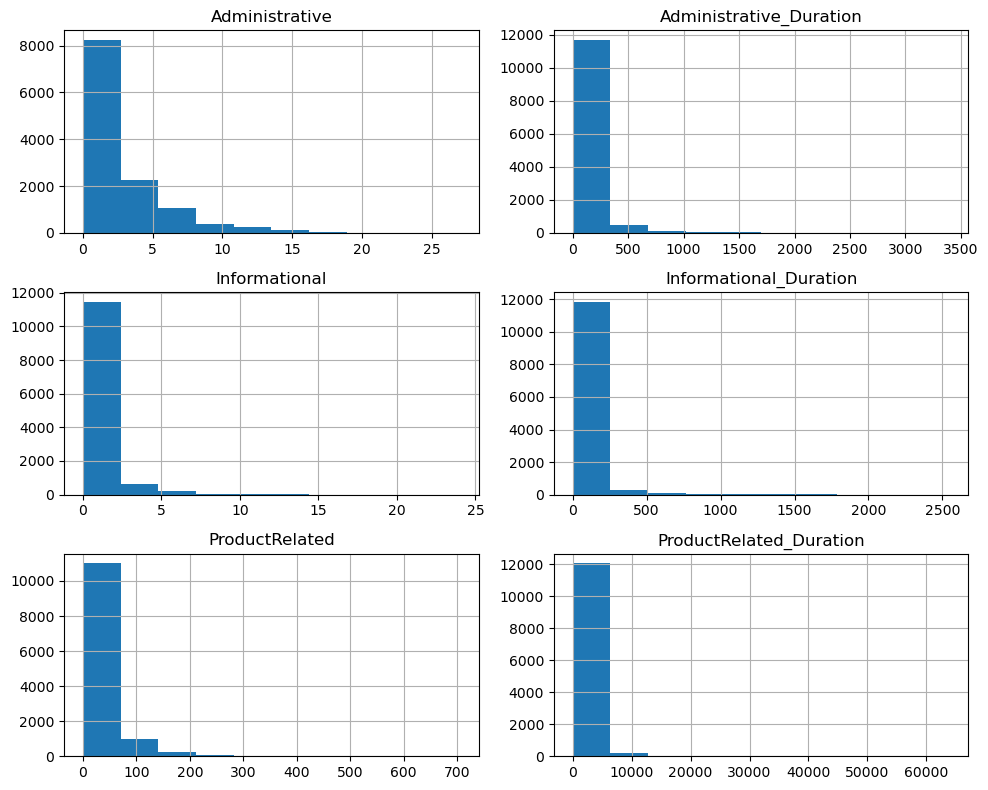

In [17]:
#Visualize the Distributions of different pages visited
different_types_pages_visited.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [18]:
different_types_pages_visited.mean()

Administrative                2.315166
Administrative_Duration      80.818611
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1194.746220
dtype: float64

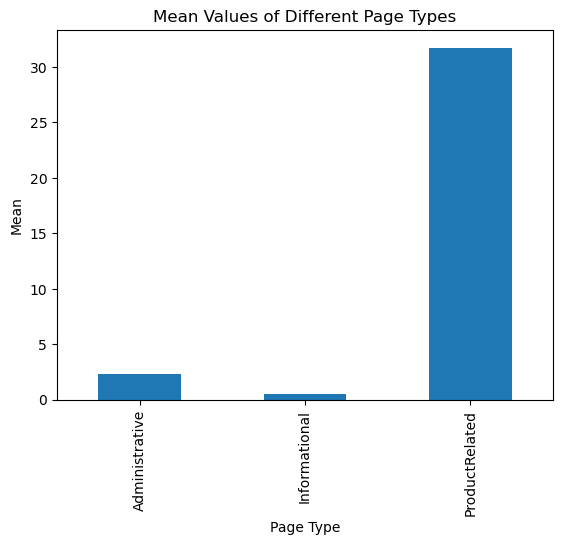

In [19]:
pages_visited_mean = df[['Administrative', 'Informational', 'ProductRelated']].mean()

#Plot Bar Chart
pages_visited_mean.plot(kind='bar')
plt.ylabel('Mean')
plt.xlabel('Page Type')
plt.title('Mean Values of Different Page Types')
plt.show()

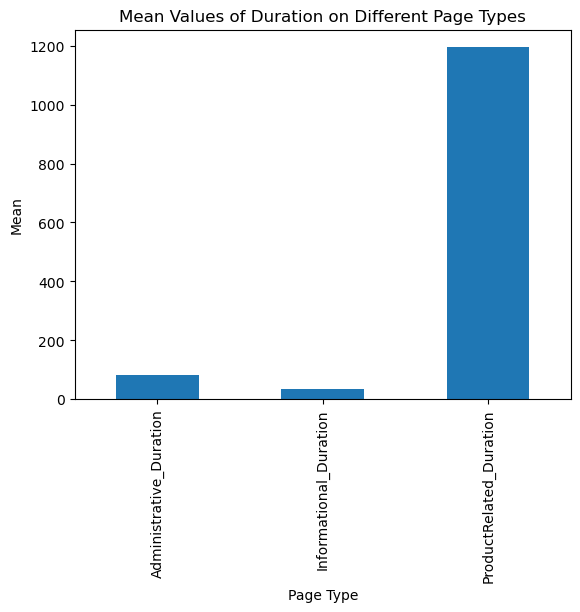

In [20]:
pages_visited_duration_mean = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean()

#Plot Bar Chart
pages_visited_duration_mean.plot(kind='bar')
plt.ylabel('Mean')
plt.xlabel('Page Type')
plt.title('Mean Values of Duration on Different Page Types')
plt.show()

Most visitors visited and spent the most amount of time on the ProductRelated webpage. Further analysis will try to determine whether underutilizing the Administrative and Informational pages is leading to less conversion.

**Univariate Analysis**

* Special Day
* Month
* Operating Systems
* Browser
* Region
* Traffic Type
* Visitor Type
* Weekend
* Revenue

**Special Day**

In [21]:
# SpecialDay values reperesent closeness of browsing dates to special days or holidays

df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

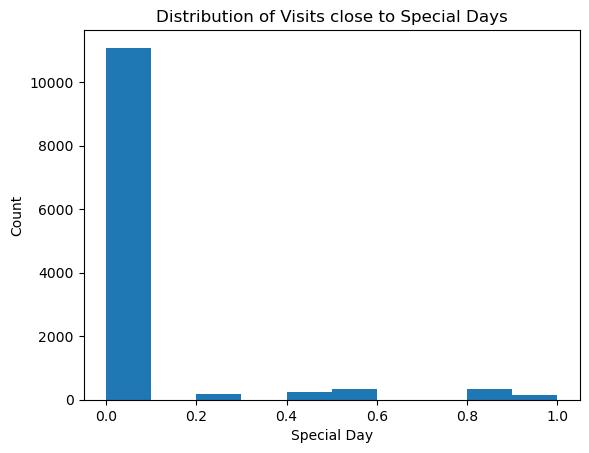

In [22]:
plt.hist(df['SpecialDay'])
plt.ylabel('Count')
plt.xlabel('Special Day')
plt.title('Distribution of Visits close to Special Days')
plt.show()

**Month**

In [23]:
#Explore what months experience the highest amounts of visits
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

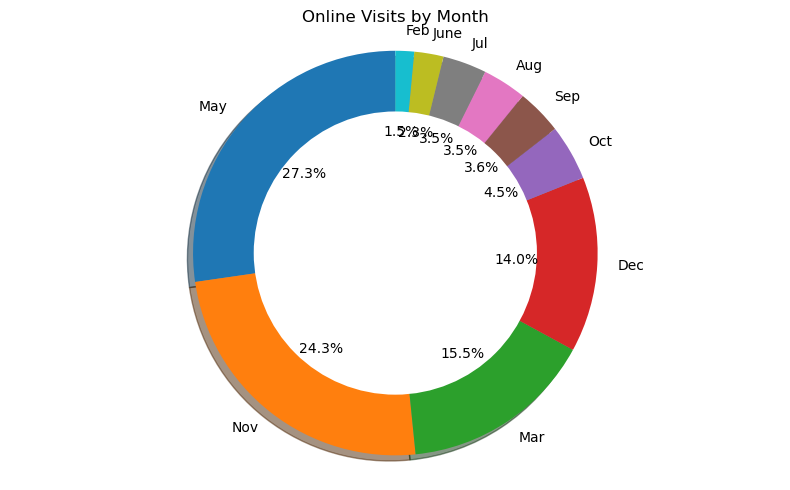

In [86]:
#Create a donut chart to visualize the distribution of visits per month

labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb']
sizes = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Online Visits by Month')
plt.tight_layout()
plt.show()

81.1% of all visits throughout the year occur in only 4 months, suggesting some seasonality. 

**OperatingSystems**

In [25]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

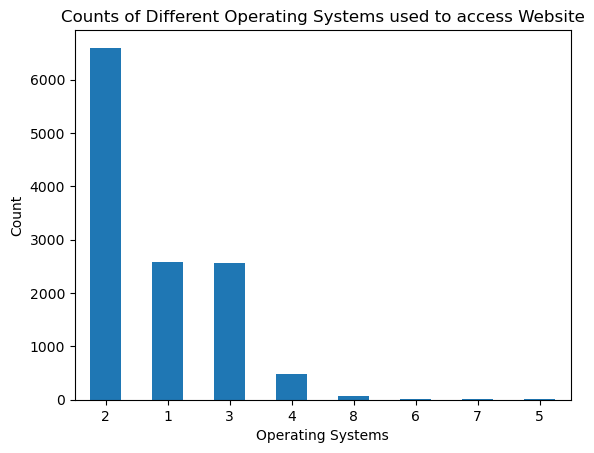

In [26]:
# Create a Bar Plot to visualize operating system counts

df['OperatingSystems'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Operating Systems')
plt.title('Counts of Different Operating Systems used to access Website')
plt.xticks(rotation=0)
plt.show()

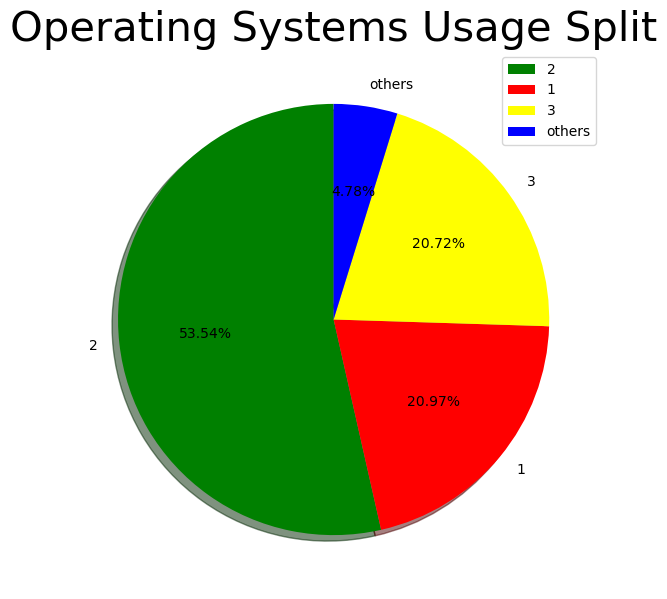

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['green', 'red', 'yellow', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Operating Systems Usage Split', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [28]:
top_OS = df['OperatingSystems'].value_counts().loc[[2, 1, 3]]
sum_OS = df['OperatingSystems'].value_counts().sum()

print('Total Top OS:',top_OS.sum())
print('Total All OS:', sum_OS)

print('Total percent of TOP OS:', top_OS.sum()/sum_OS)

Total Top OS: 11741
Total All OS: 12330
Total percent of TOP OS: 0.9522303325223034


The Top 3 Operating Systems account for 95.2% of all visits.

**Browser**

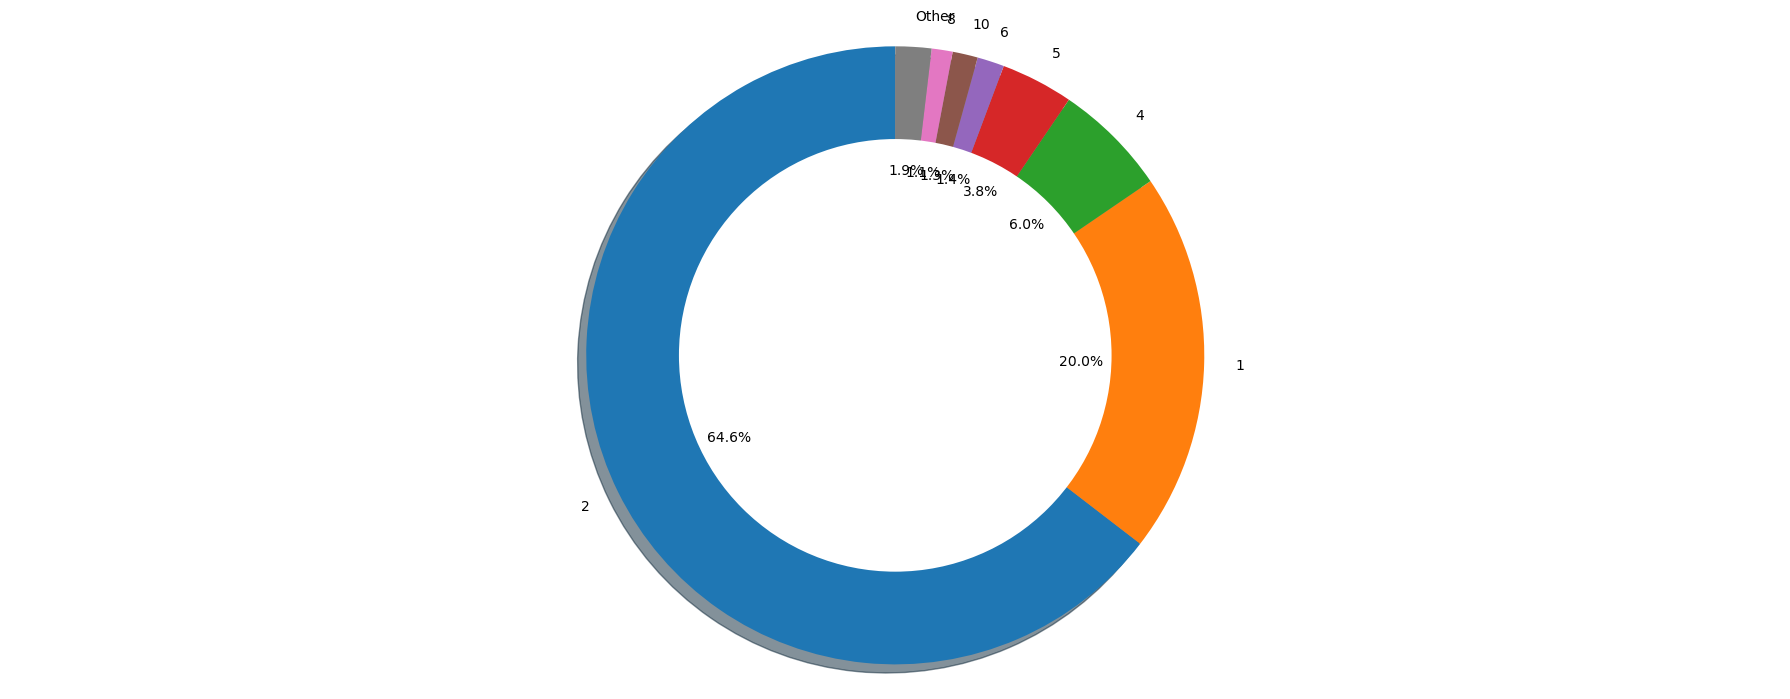

In [29]:
# Plot donut chart to visualize Browswer counts
#Create a donut chart to visualize the distribution of visits per month

labels = ['2', '1', '4', '5', '6', '10', '8', 'Other']
sizes = [7961, 2462, 736, 467, 174, 163, 135, 232]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()
plt.show()

In [30]:
top_browser = df['Browser'].value_counts().loc[[2, 1, 4]]
sum_browswer = df['OperatingSystems'].value_counts().sum()

print('Total Top Browser:',top_browser.sum())
print('Total All Browser:', sum_browswer)

print('Total percent of TOP OS:', top_browser.sum()/sum_browswer)

Total Top Browser: 11159
Total All Browser: 12330
Total percent of TOP OS: 0.9050283860502839


The Top 3 Browsers account for 95.2% of all visits.

**Region**

In [31]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

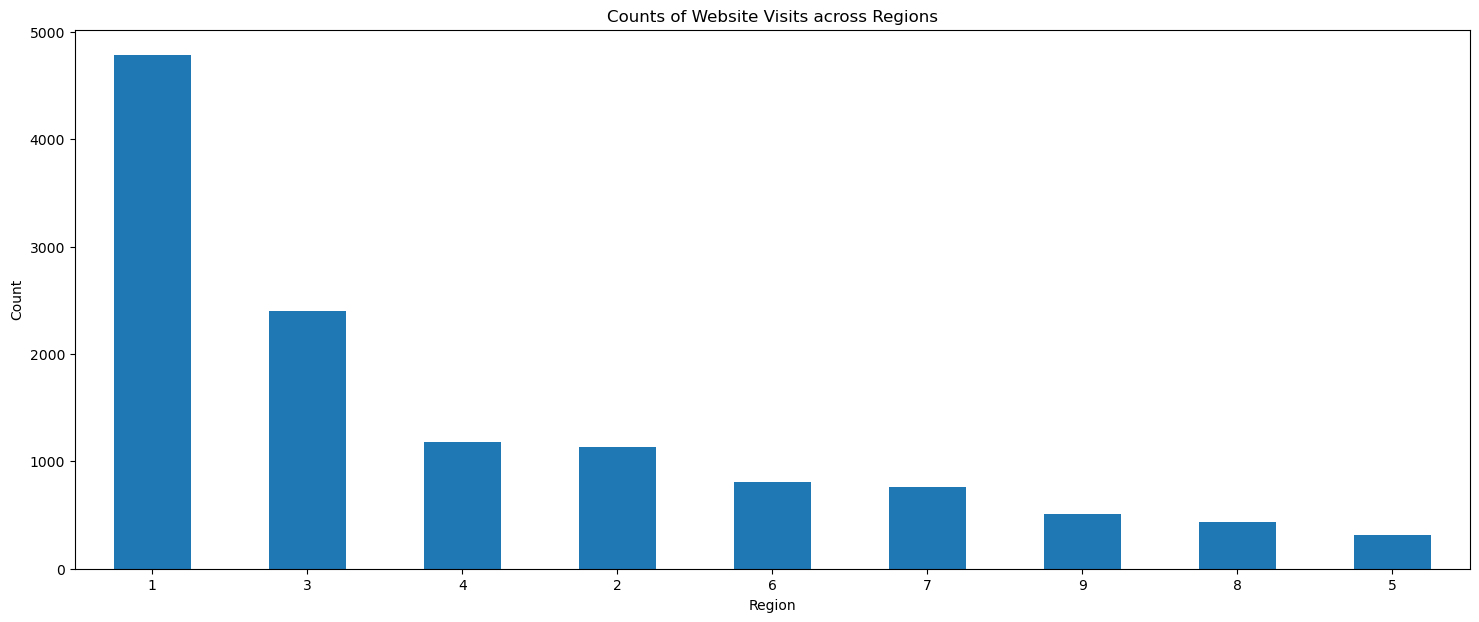

In [32]:
df['Region'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Region')
plt.title('Counts of Website Visits across Regions')
plt.xticks(rotation=0)
plt.show()

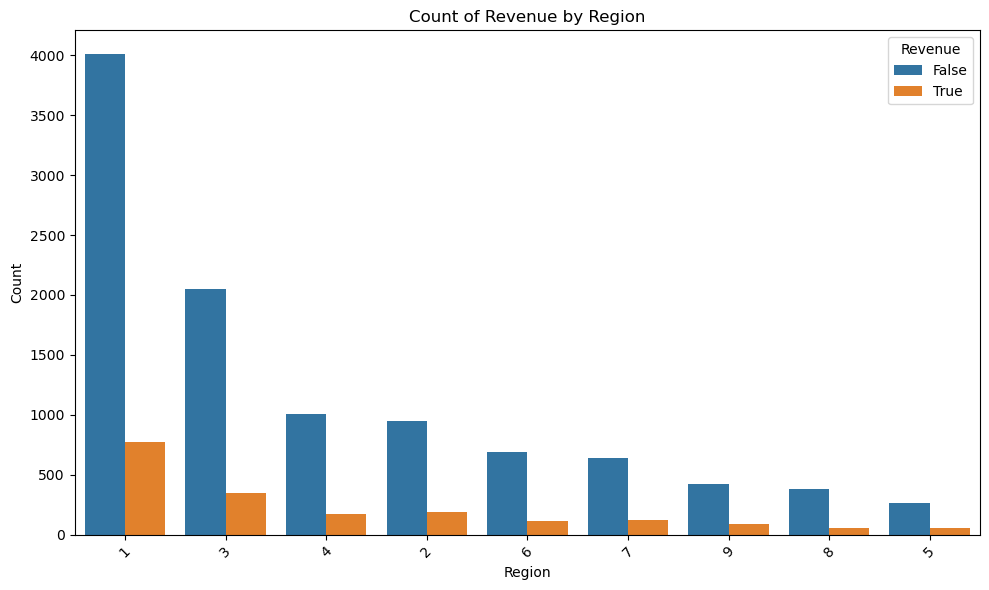

In [88]:
region_df = df.groupby(['Region', 'Revenue']).size().reset_index(name='Count')

# Sort the categories by count in descending order
sorted_region_types = region_df.groupby('Region')['Count'].sum().sort_values(ascending=False).index

# Create the count plot with sorted categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Revenue', data=df, order=sorted_region_types)
plt.title('Count of Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Revenue')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

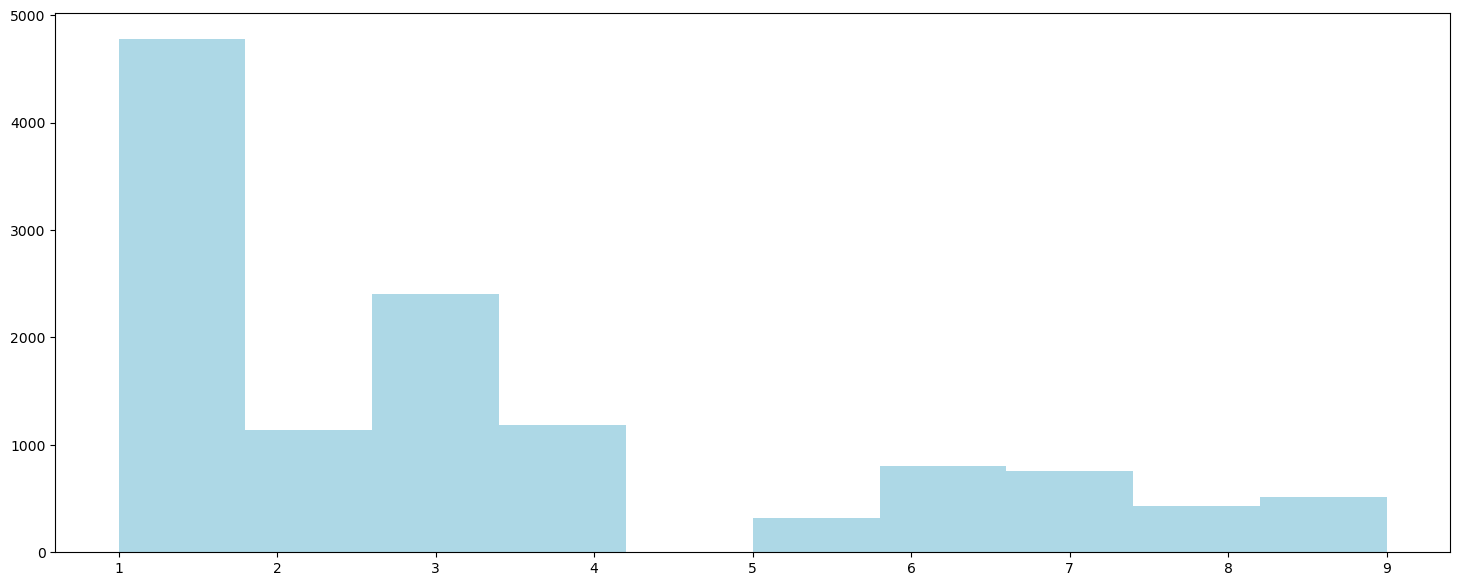

<Figure size 1000x800 with 0 Axes>

In [33]:
#Check Distribution of Regions

plt.hist(df['Region'], color='lightblue')
plt.figure(figsize=(10, 8))
plt.show()

We see that region 1 and to a lesser extent region 3; experience greater visitor frequency and subsequently a higher revenue conversion. The Distribution of Visitiors across different Regions is exponentially distributed. We will approach this later in the analysis

**TrafficType**

"Traffic type" typically refers to the source or channel through which visitors arrive at a website. It categorizes the different ways users come to a website. These categories can include:

* Direct Traffic: Visitors who directly type the website's URL into their browser or use bookmarks.

* Search Engine Traffic: Visitors who find the website through search engines like Google, Bing, or Yahoo.

* Referral Traffic: Visitors who land on the website by clicking on a link from another website.

* Social Media Traffic: Visitors who arrive at the website through links shared on social media platforms like Facebook, Twitter, or Instagram.

* Email Traffic: Visitors who click on links within emails or newsletters.

* Paid Traffic: Visitors who arrive at the website through paid advertisements, such as Google Ads or sponsored posts.

* Organic Traffic: Visitors who find the website through unpaid search engine results.

In [34]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

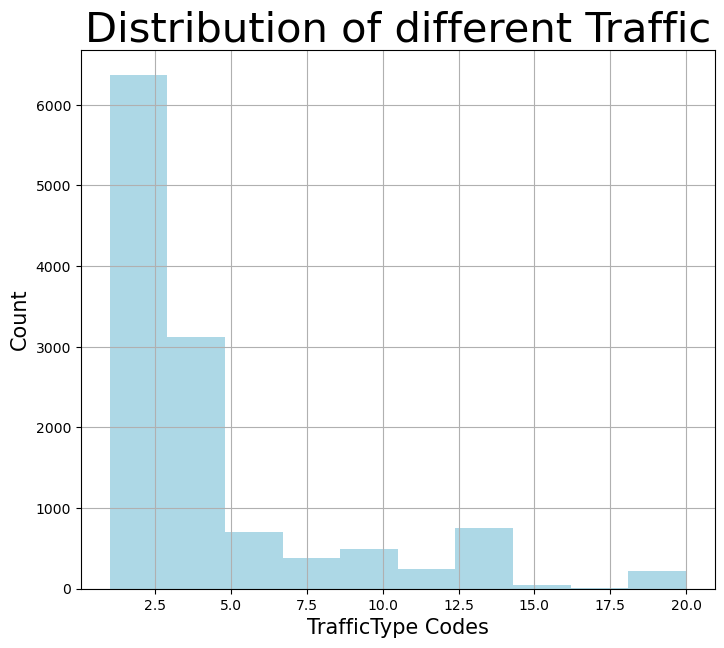

In [35]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

**Visitor Type**

In [38]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [39]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

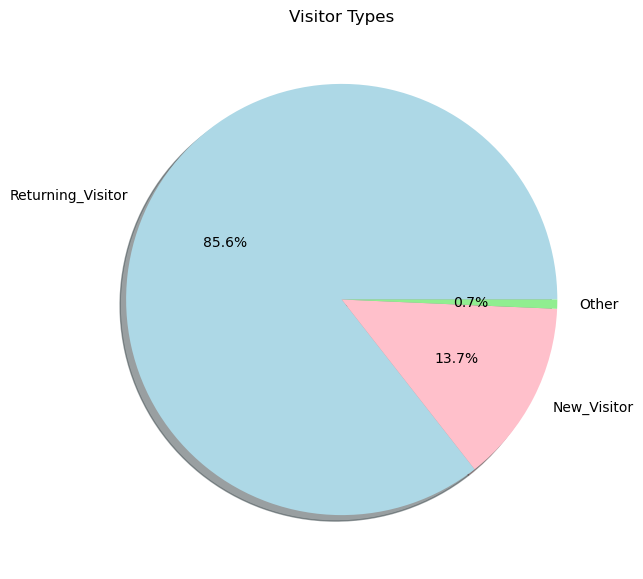

In [40]:
colors = ['#ADD8E6', '#FFC0CB', '#90EE90']
df['VisitorType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)
plt.title('Visitor Types')
plt.ylabel('')
plt.show()

Customer Retention appears to be high which is a great sign.

**Weekend**

In [41]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

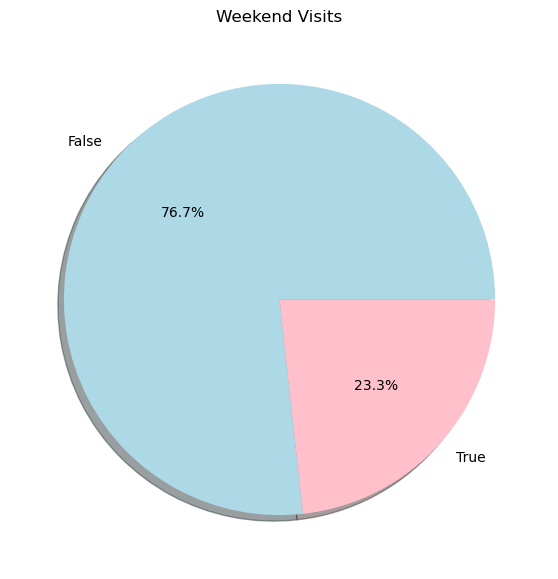

In [42]:
colors = ['#ADD8E6', '#FFC0CB', '#90EE90']
df['Weekend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)
plt.title('Weekend Visits')
plt.ylabel('')
plt.show()

**Revenue**

In [43]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

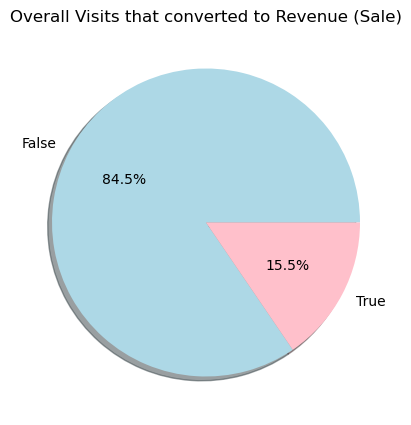

In [159]:
colors = ['#ADD8E6', '#FFC0CB', '#90EE90']
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, shadow=True)
plt.title('Overall Visits that converted to Revenue (Sale)')
plt.ylabel('')
plt.show()

It looks like there is space for improvement in sale conversions. Further analysis will determine where these opportunities exist.

**Correlation, Bi-variate and Multi-variate Analysis**

In [45]:
# Store numerical categories
numerical_categories = df[['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']]


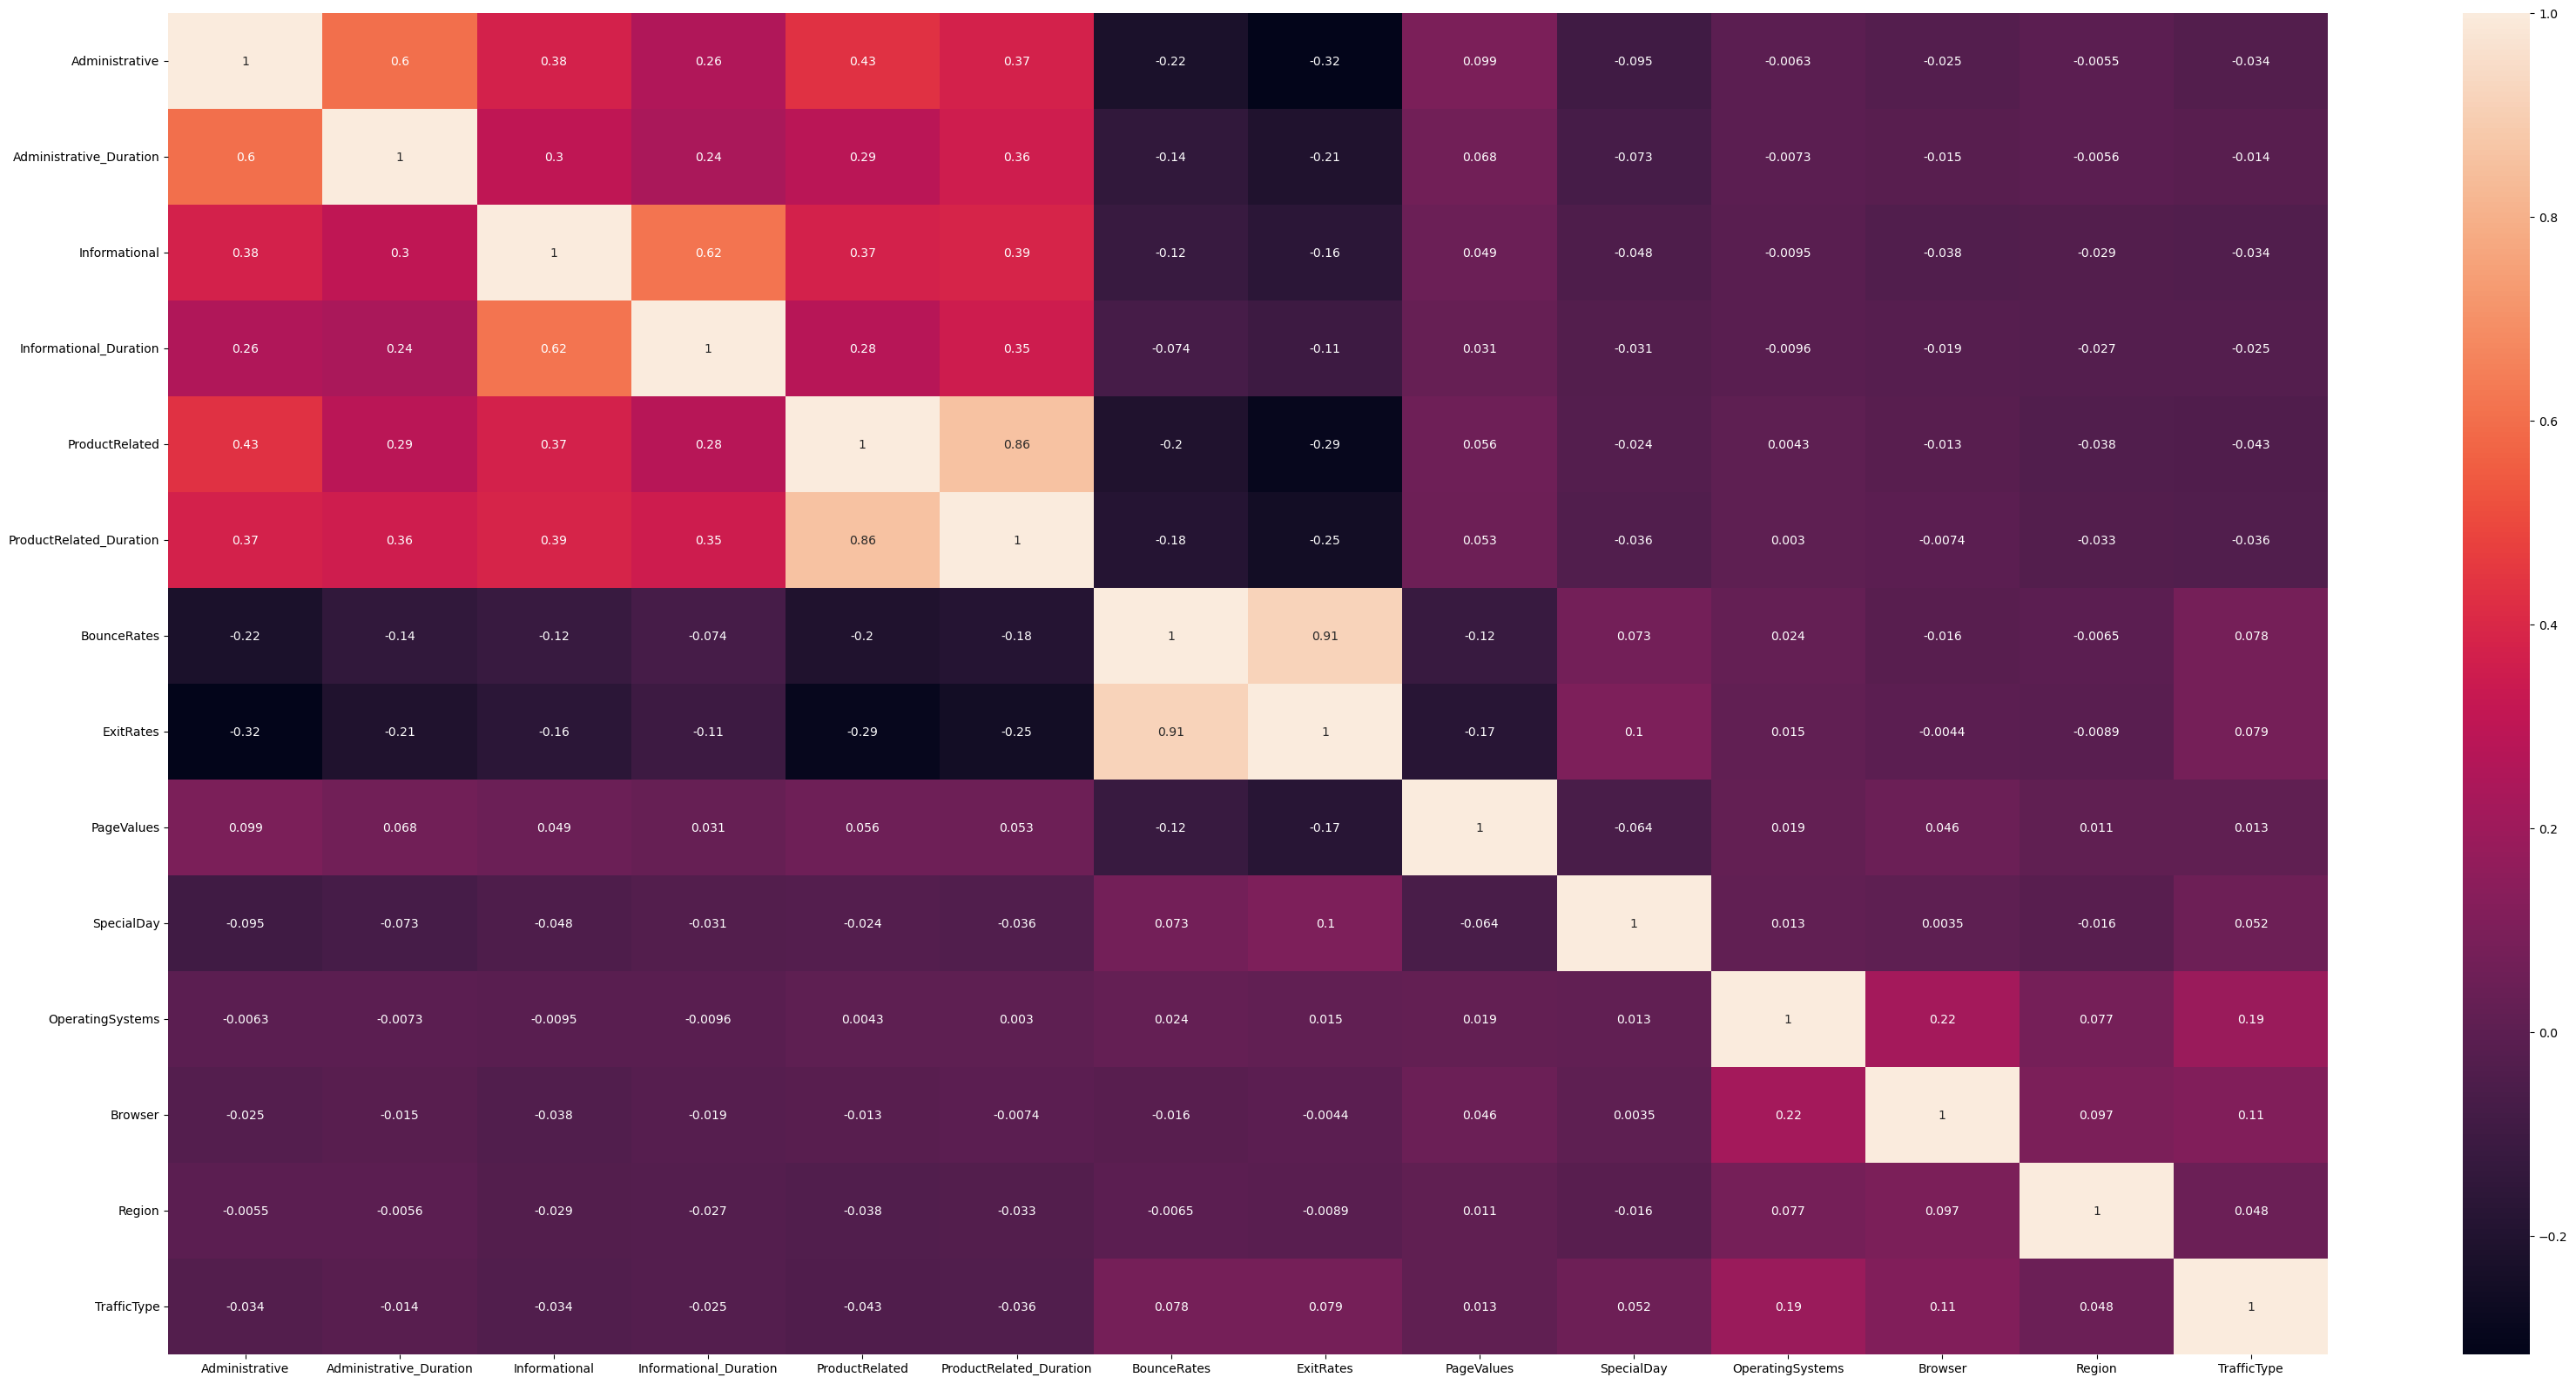

In [46]:
# Heatmap of numerical categories
plt.figure(figsize=(40,20))
sns.heatmap(numerical_categories.corr(), annot=True)
plt.show()

In [47]:
#Encode Categorical variables to get heatmap with revenue in relation to features

encoded_df = pd.get_dummies(df)
encoded_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


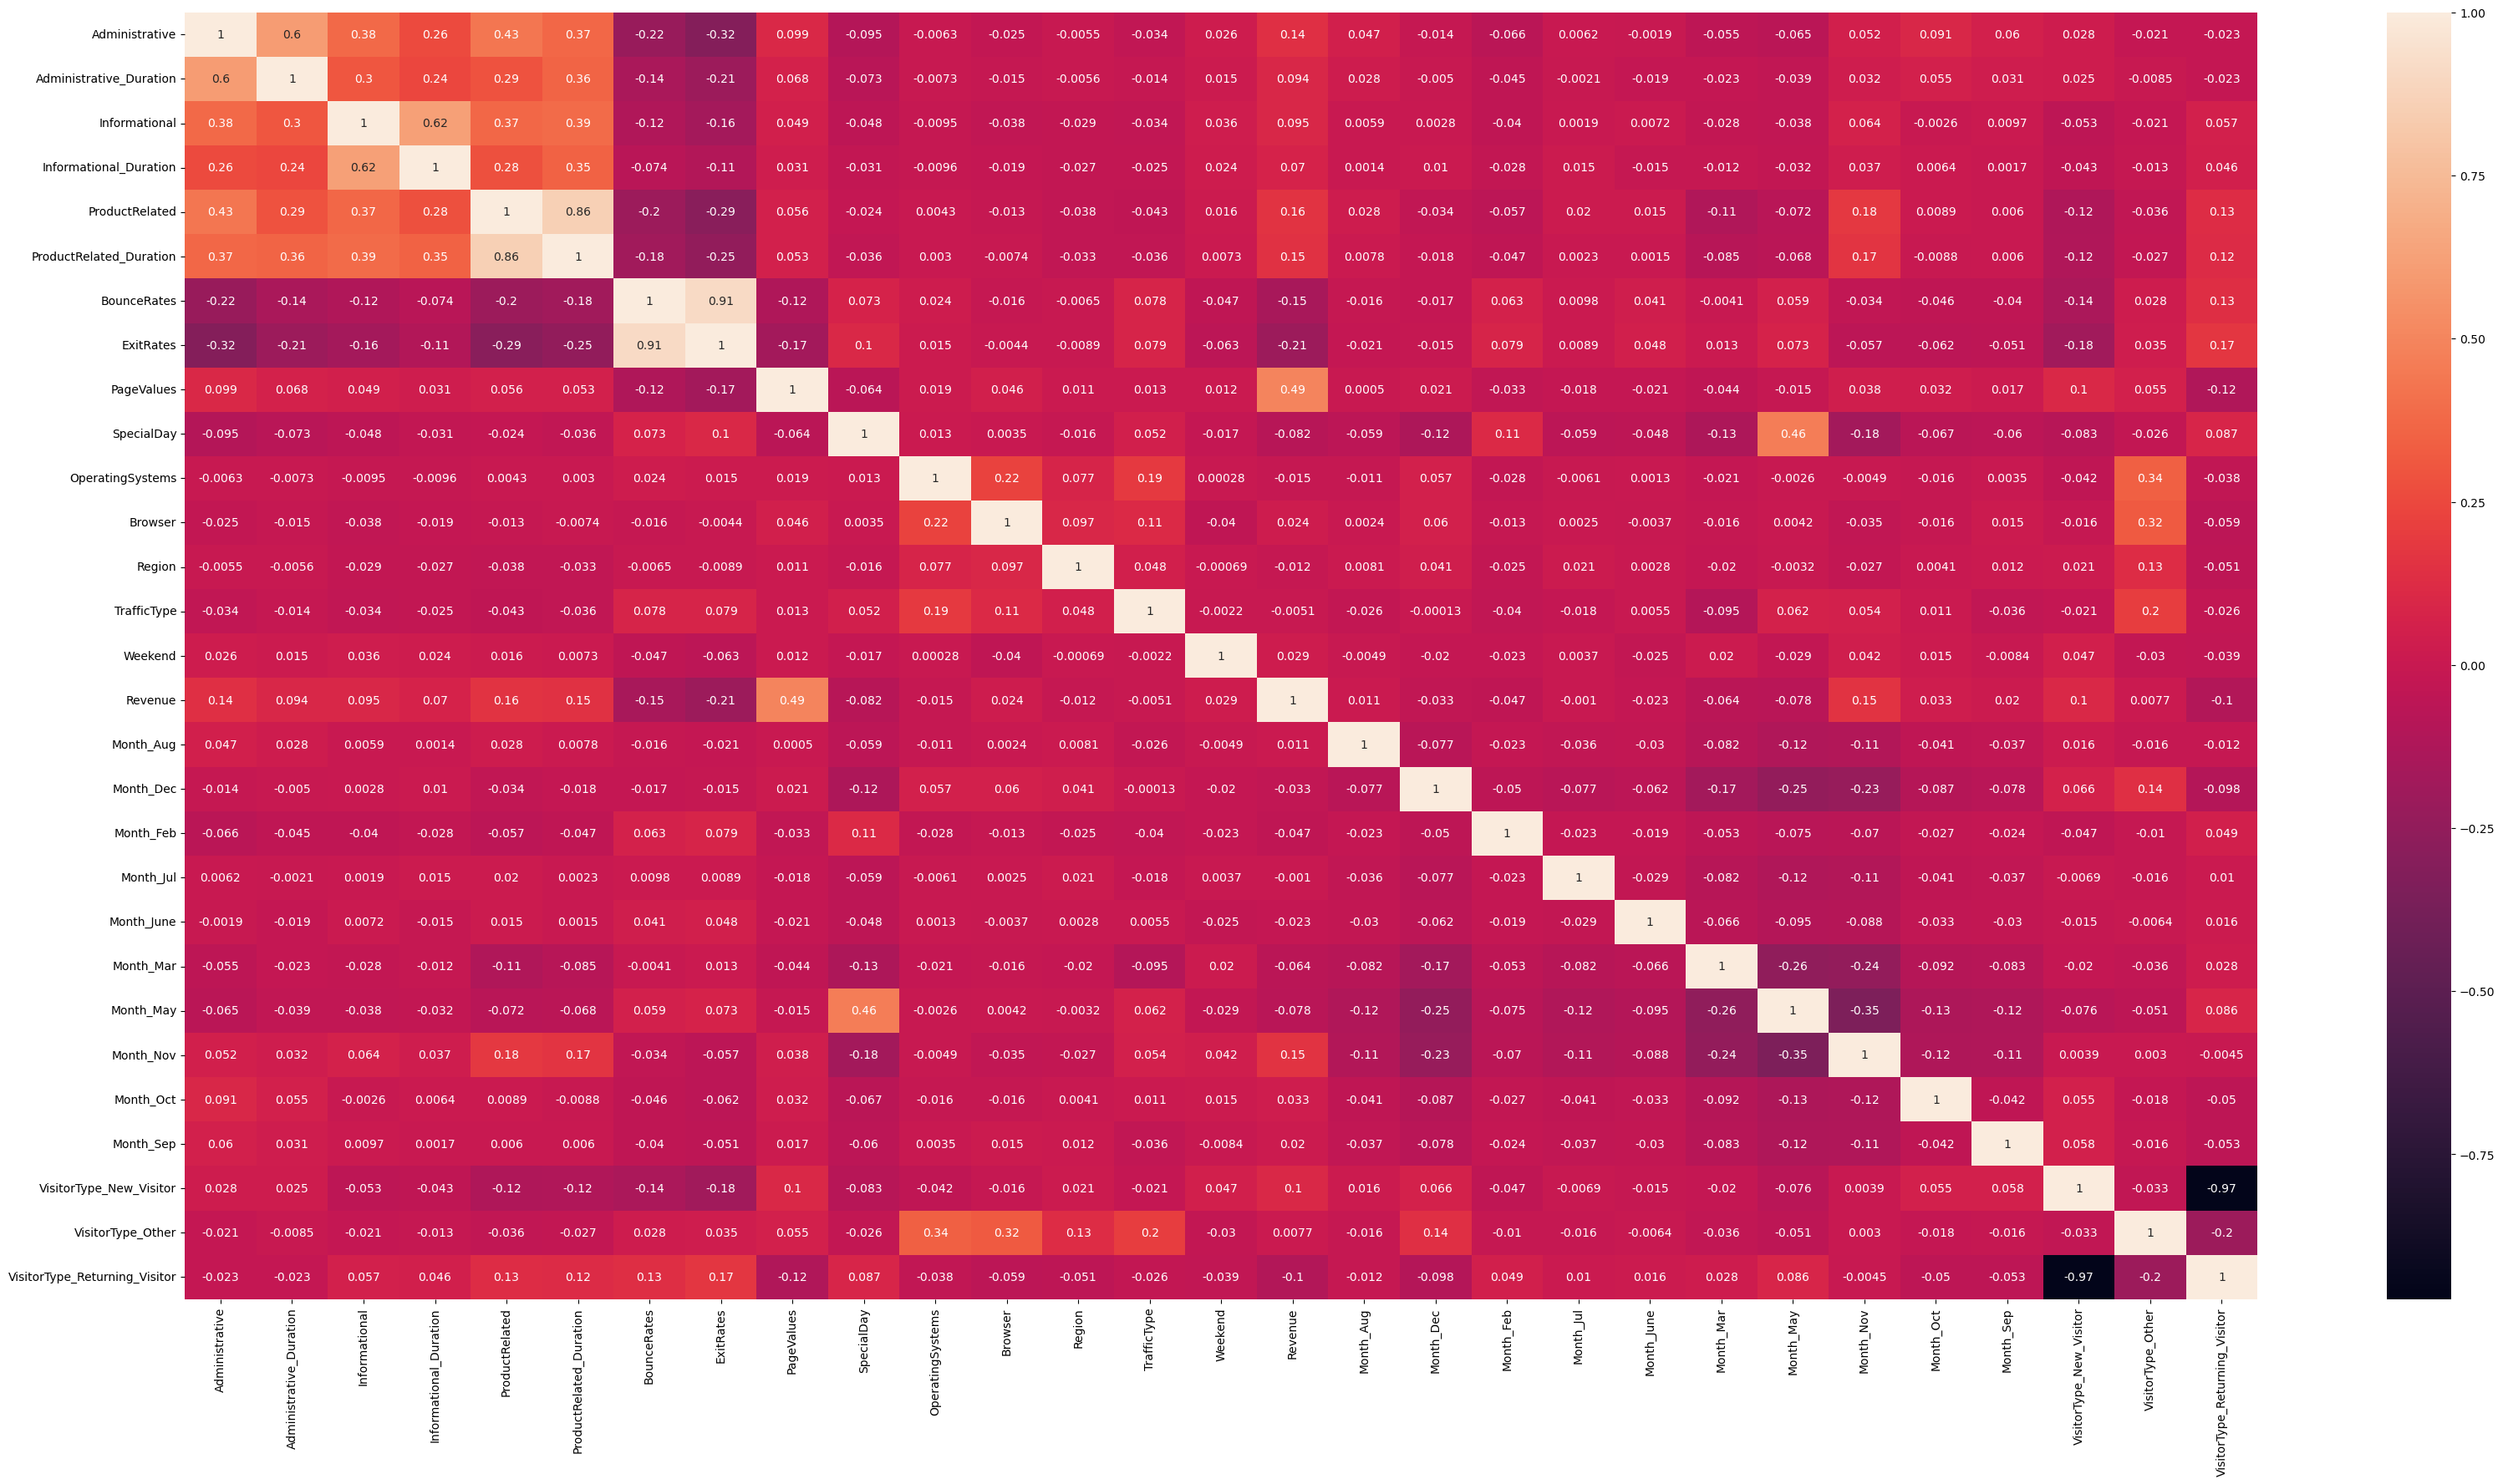

In [48]:
# Heatmap of numerical categories
plt.figure(figsize=(40,20))
sns.heatmap(encoded_df.corr(), annot=True)
plt.show()

From the Heatmap we can observe that 'PageValue' has the strongest correlation to Revenue. We can check the independent relationship below

In [49]:
# Compute correlation matrix
correlation_matrix = encoded_df.corr()

# Check correlation between feature1 and feature2
correlation_revenue_pagevalues = correlation_matrix.loc['Revenue', 'PageValues']

print("Correlation between Revenue and PageValues:", correlation_revenue_pagevalues)

Correlation between Revenue and PageValues: 0.49256929525120574


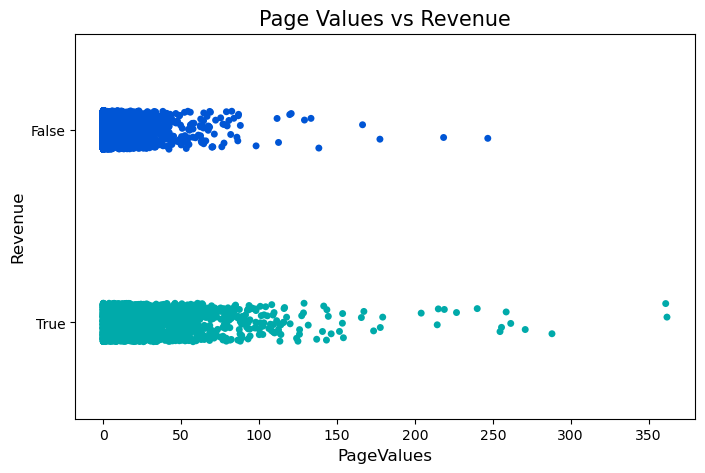

In [50]:
# Create a strip plot to visualize PageValue influence on Revenue

plt.rcParams['figure.figsize'] = (8, 5)

# Create strip plot
sns.stripplot(x='PageValues', y='Revenue', data=df, palette='winter', orient='h')
plt.title('Page Values vs Revenue', fontsize=15)
plt.xlabel('PageValues', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

We observe a positive relationship where Revenue is True as PageValues increase. This is an encouraging sign, indicating that as PageValues increase, more visits are being converted to sales. It suggests the times that visitors do perceive Page or Product value, they are converting into buyers. However, we have to be cognizant that overall only 15.5% of visiters convert. We'll explore other relations to Revenue to get a better sense for conversion opportunities.

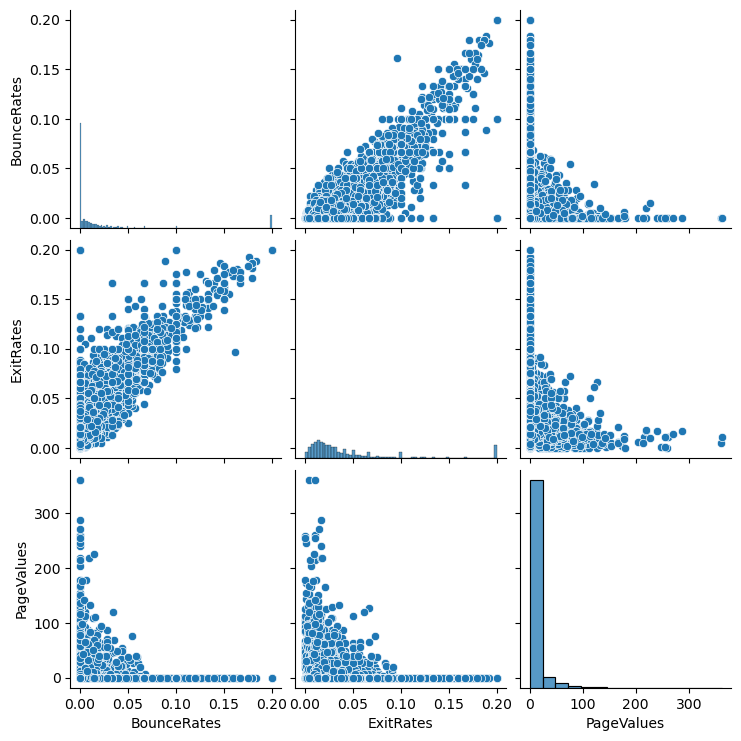

In [51]:
sns.pairplot(df, vars=['BounceRates', 'ExitRates', 'PageValues'])

There appears to be a linear relatinoship between ExitRates and BounceRates.

As a reminder - Bounce rate is a metric used in web analytics to measure the percentage of visitors who enter a website and then leave ("bounce") without interacting further with the site by viewing other pages or taking any additional actions. A high bounce rate typically indicates that visitors are not finding the content they expected, the website design is not engaging, or there may be other usability issues.

Not surprisingly, we see the page value generally increase when bounce rates are lower and vice versa. A similar pattern is observed for Exit Rates, we'll explore both against revenue to see if there is any significant relationship

Exit rate Is a web analytic metric that measures the percentage of visitors who leave a website from a particular page after viewing it. Unlike bounce rate, which measures the percentage of visitors who leave the website from the *entrance *page without interacting with any other pages, exit rate specifically focuses on the last page a visitor views before leaving the site.

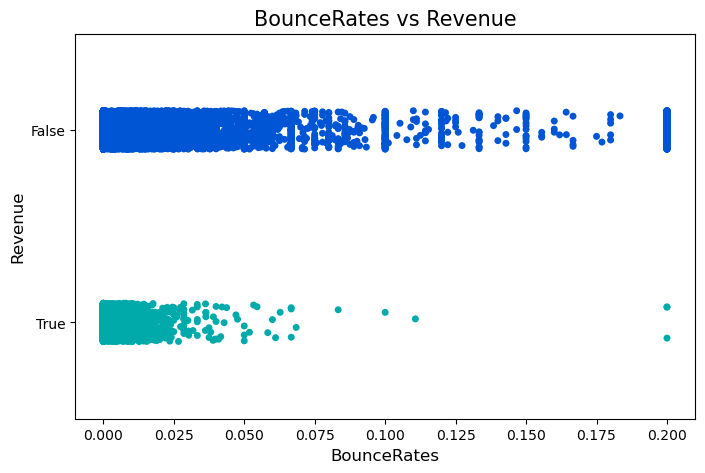

In [52]:
# Create a strip plot to visualize BounceRate influence on Revenue

plt.rcParams['figure.figsize'] = (8, 5)

# Create strip plot
sns.stripplot(x='BounceRates', y='Revenue', data=df, palette='winter', orient='h')
plt.title('BounceRates vs Revenue', fontsize=15)
plt.xlabel('BounceRates', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

This could be a signal that the landing page is not effectively guiding visitors through the conversion funnel or users are not finding what they desire upon arriving to the website. However, more research has to be done in order to discern what exactly is the cause; it may be that users are experiencing slow loading times, complex navigaton and other technical issues as well as poor response to the product offering.

In [53]:
# Compute correlation matrix
correlation_matrix = encoded_df.corr()

# Check correlation between feature1 and feature2
correlation_revenue_bouncerates = correlation_matrix.loc['Revenue', 'BounceRates']

print("Correlation between Revenue and BounceRates:", correlation_revenue_bouncerates)

Correlation between Revenue and BounceRates: -0.1506729119260533


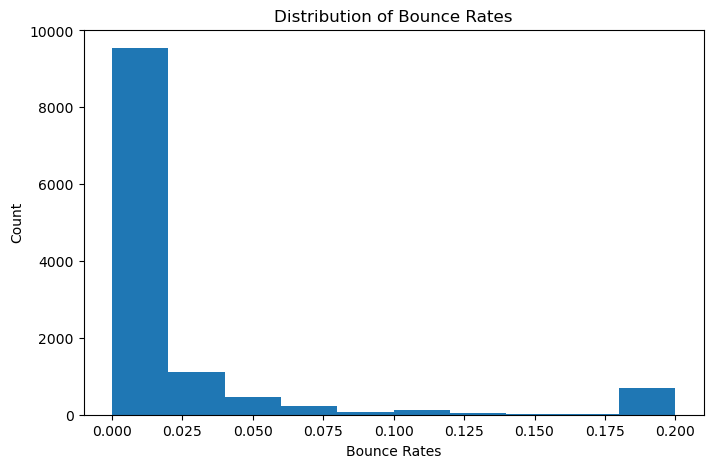

In [54]:
df['BounceRates'].value_counts()

plt.hist(df['BounceRates'])
plt.ylabel('Count')
plt.xlabel('Bounce Rates')
plt.title('Distribution of Bounce Rates')
plt.show()

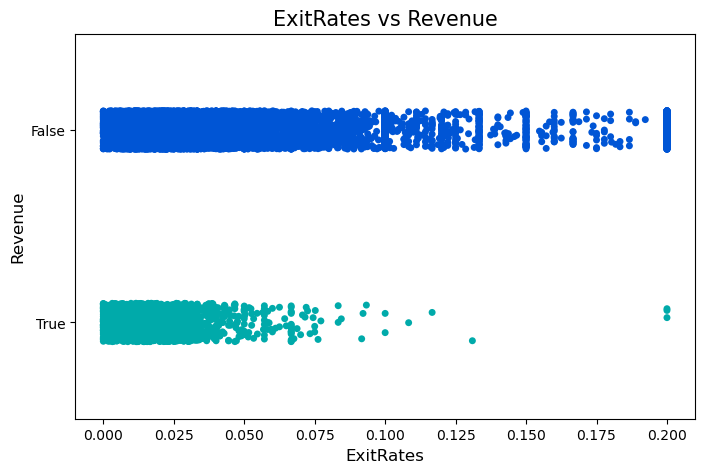

In [55]:
# Create a strip plot to visualize ExitRate influence on Revenue

plt.rcParams['figure.figsize'] = (8, 5)

# Create strip plot
sns.stripplot(x='ExitRates', y='Revenue', data=df, palette='winter', orient='h')
plt.title('ExitRates vs Revenue', fontsize=15)
plt.xlabel('ExitRates', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

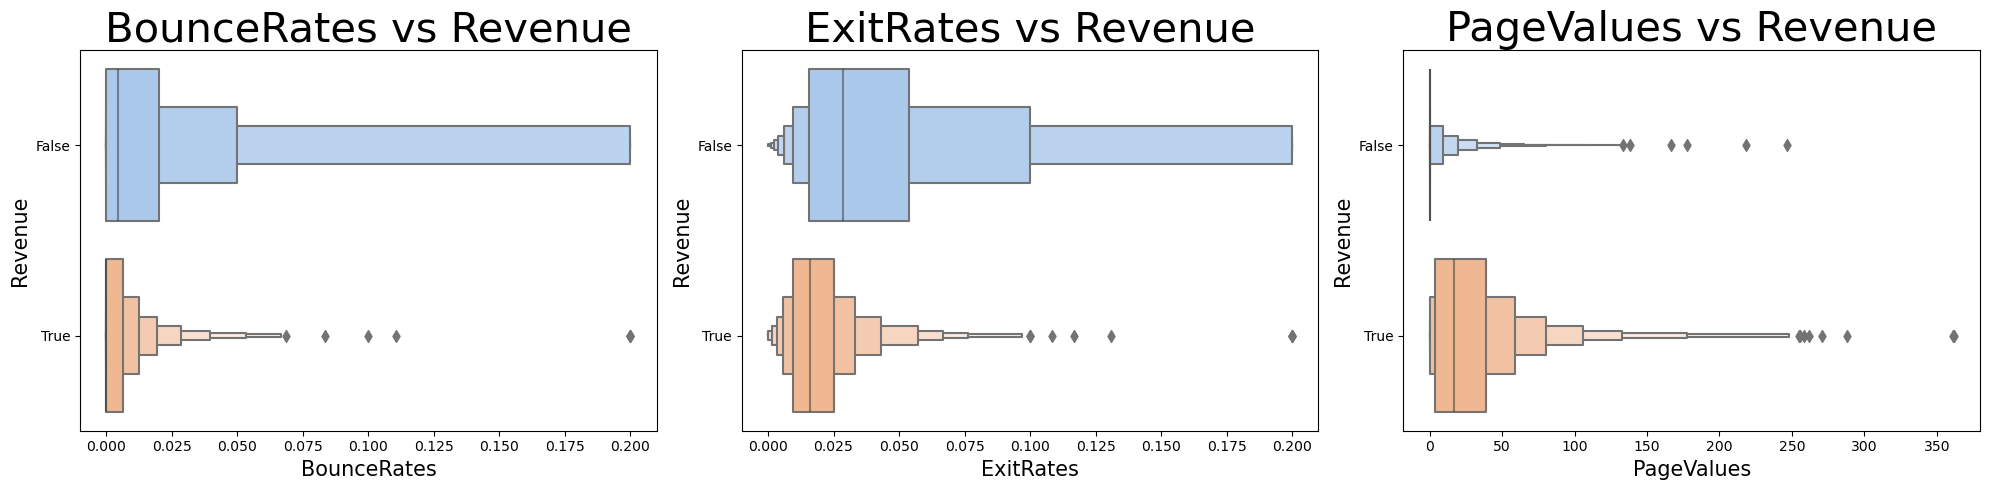

In [110]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 3)

# Plot the first graph on the first subplot
sns.boxenplot(x='BounceRates', y='Revenue', data=df, palette='pastel', orient='h', ax=axes[0])
axes[0].set_title('BounceRates vs Revenue', fontsize=30)
axes[0].set_xlabel('BounceRates', fontsize=15)
axes[0].set_ylabel('Revenue', fontsize=15)

# Plot the second graph on the second subplot
sns.boxenplot(x='ExitRates', y='Revenue', data=df, palette='pastel', orient='h', ax=axes[1])
axes[1].set_title('ExitRates vs Revenue', fontsize=30)
axes[1].set_xlabel('ExitRates', fontsize=15)
axes[1].set_ylabel('Revenue', fontsize=15)

# Plot the third graph on the third subplot
sns.boxenplot(x='PageValues', y='Revenue', data=df, palette='pastel', orient='h', ax=axes[2])
axes[2].set_title('PageValues vs Revenue', fontsize=30)
axes[2].set_xlabel('PageValues', fontsize=15)
axes[2].set_ylabel('Revenue', fontsize=15)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

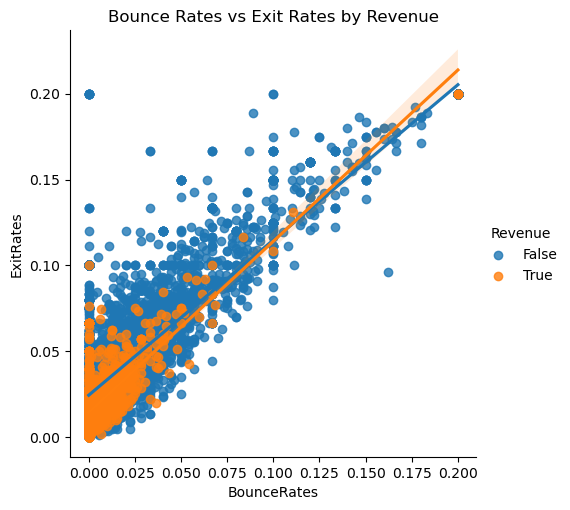

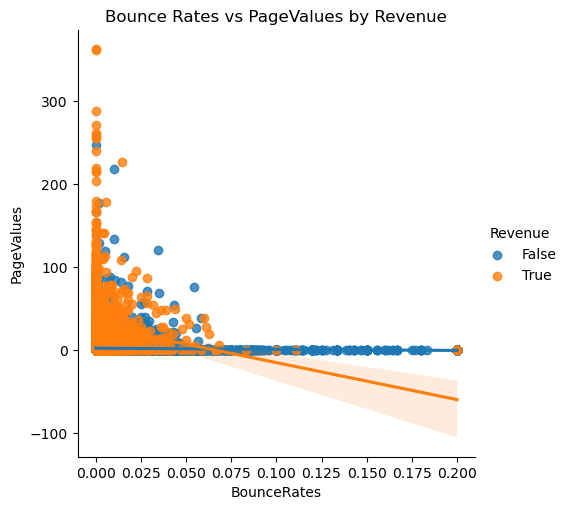

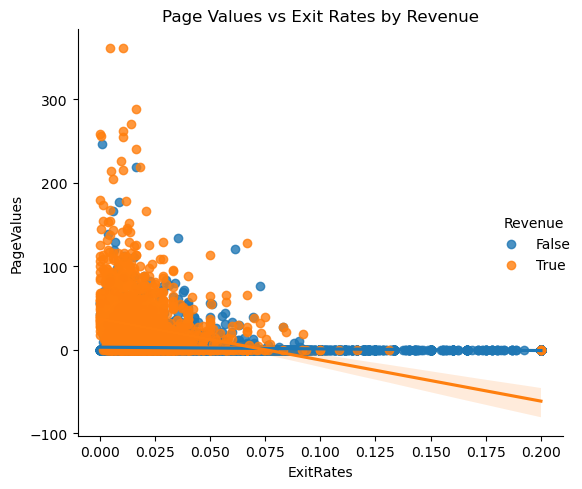

In [114]:
plt.rcParams['figure.figsize'] = (20, 5)  # Adjust the figure size as needed

# Plot the first graph on the first subplot
sns.lmplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df)
plt.title('Bounce Rates vs Exit Rates by Revenue')

# Plot the second graph on the second subplot
sns.lmplot(x='BounceRates', y='PageValues', hue='Revenue', data=df)
plt.title('Bounce Rates vs PageValues by Revenue')

# Plot the third graph on the third subplot
sns.lmplot(x='ExitRates', y='PageValues', hue='Revenue', data=df)
plt.title('Page Values vs Exit Rates by Revenue')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()



The first lmplot indicates a similar linear relationship between Exit Rates and Bounce Rates that we've seen previously, as well, it is good to note that revenue conversion occurred most frequently when both rates were low. 

Similarily, very few conversions occureed in the other two plots when both Bounce and Exit Rates were low, despite that page values were low for some of the occurences as well. 

Let's take a look to see how these values fluctuate during different months

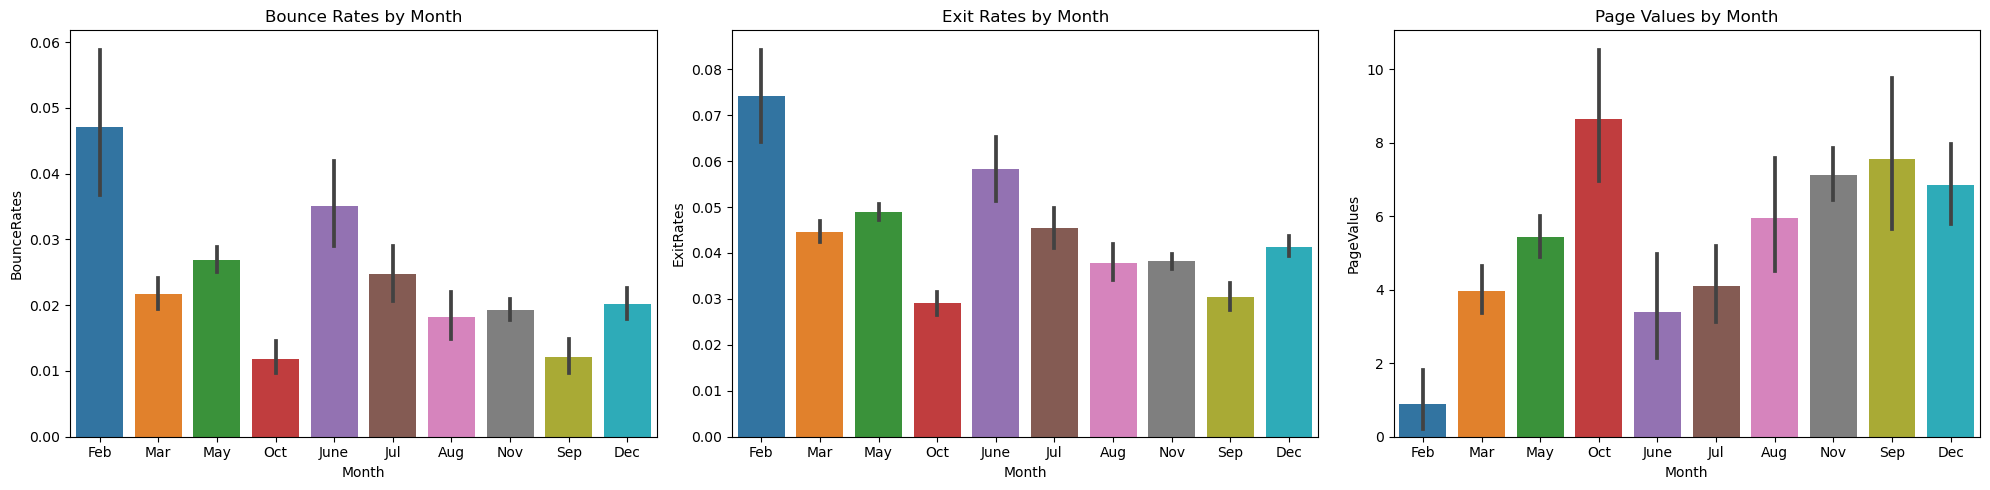

In [56]:
plt.rcParams['figure.figsize'] = (20, 5)  # Adjust the figure size as needed

# Create a grid of 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3)

# Plot the first graph on the first subplot
sns.barplot(x='Month', y='BounceRates', data=df, ax=axes[0])
axes[0].set_title('Bounce Rates by Month')

# Plot the second graph on the second subplot
sns.barplot(x='Month', y='ExitRates', data=df, ax=axes[1])
axes[1].set_title('Exit Rates by Month')

# Plot the third graph on the third subplot
sns.barplot(x='Month', y='PageValues', data=df, ax=axes[2])
axes[2].set_title('Page Values by Month')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

There seems to be a slight inverse relationship with the Bounce and Exit Rates against Page Values; ie. for some months when the rates are high the Page value is low and vice versa. This makes sense given these two factors are determinants for consistent Page Value. 

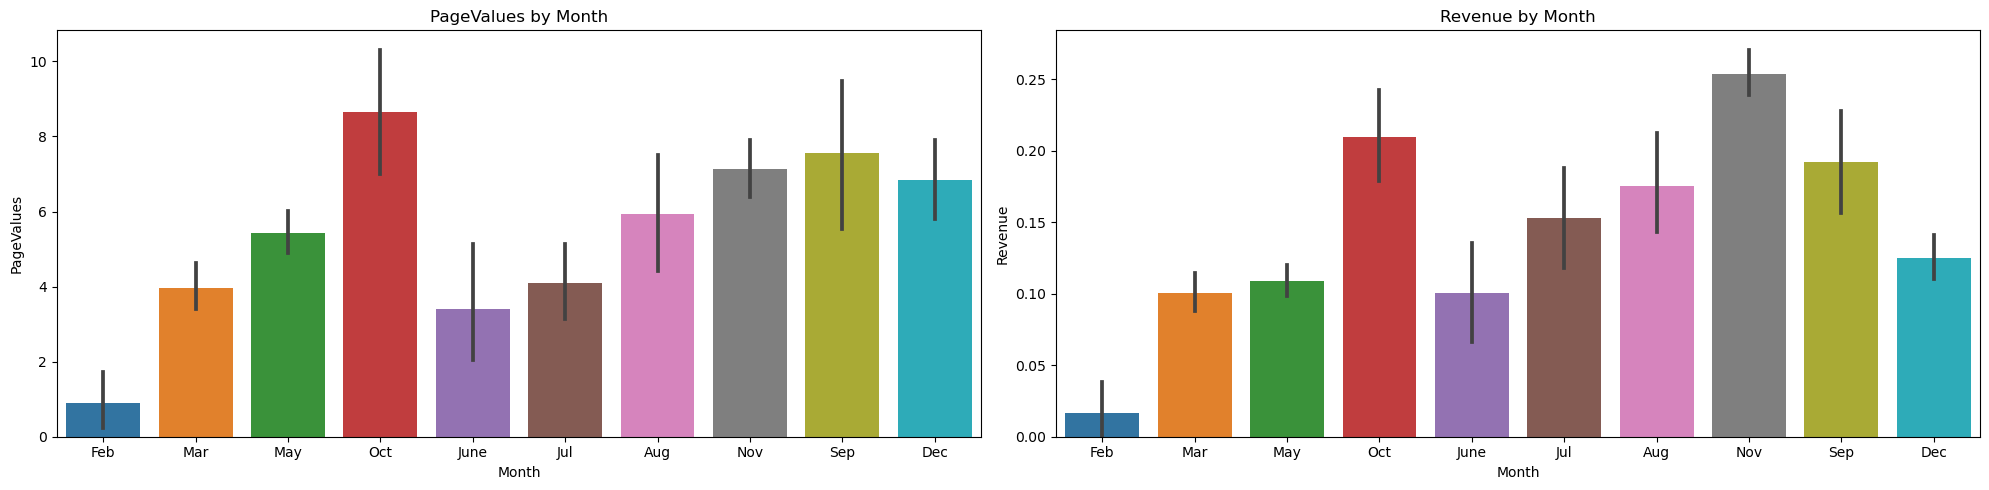

In [57]:
#Comparison of PageValues by Month and Revenue by Month 

plt.rcParams['figure.figsize'] = (20, 5)  # Adjust the figure size as needed

# Create a grid of 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 2)

# Plot the first graph on the first subplot
sns.barplot(x='Month', y='PageValues', data=df, ax=axes[0])
axes[0].set_title('PageValues by Month')

# Plot the second graph on the second subplot
sns.barplot(x='Month', y='Revenue', data=df, ax=axes[1])
axes[1].set_title('Revenue by Month')


plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

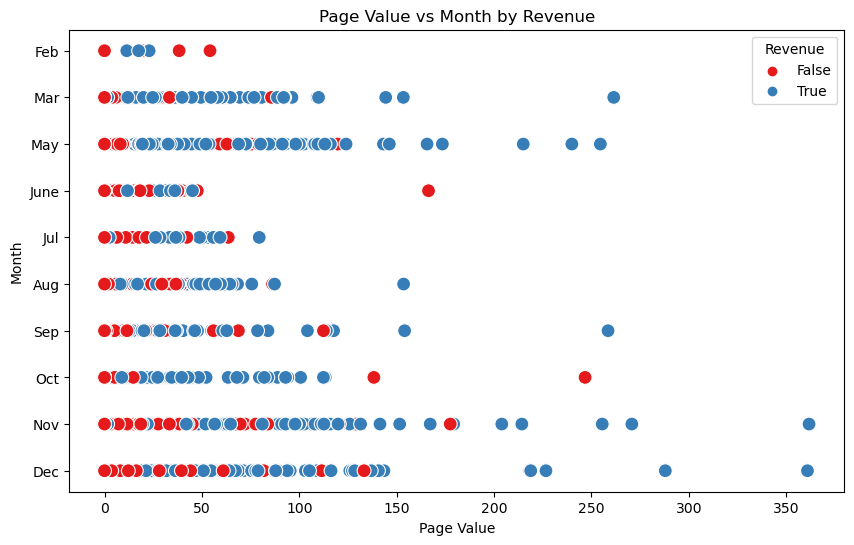

In [203]:
custom_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' column to categorical type with custom order
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PageValues', y='Month', hue='Revenue', palette='Set1', s=100)
plt.xlabel('Page Value')
plt.ylabel('Month')
plt.title('Page Value vs Month by Revenue')
plt.legend(title='Revenue')
plt.show()

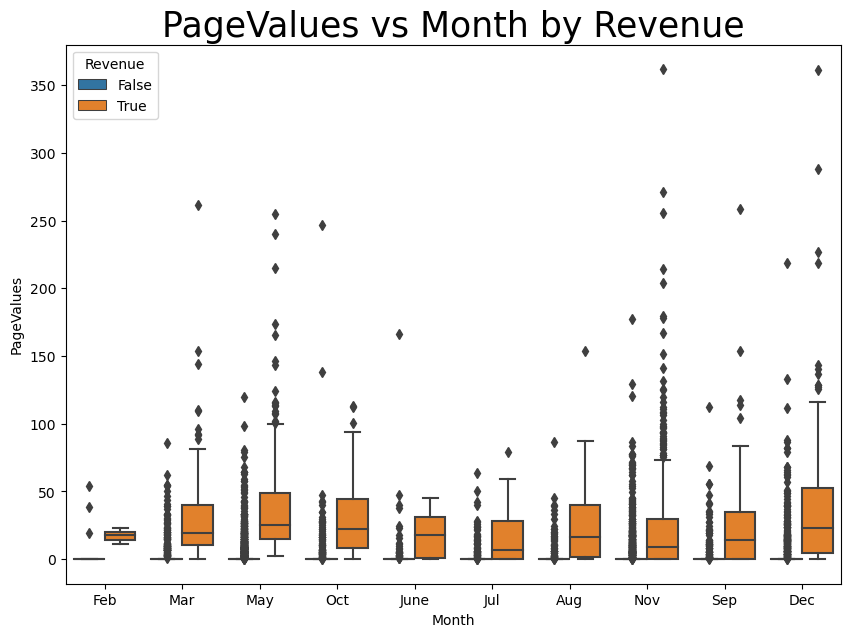

In [179]:
# Create a boxplot to see if it gives a different interpretation

plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = ['#1f77b4', '#ff7f0e'])
plt.title('PageValues vs Month by Revenue', fontsize = 25)
plt.show()

SpecialDay vs Revenue 

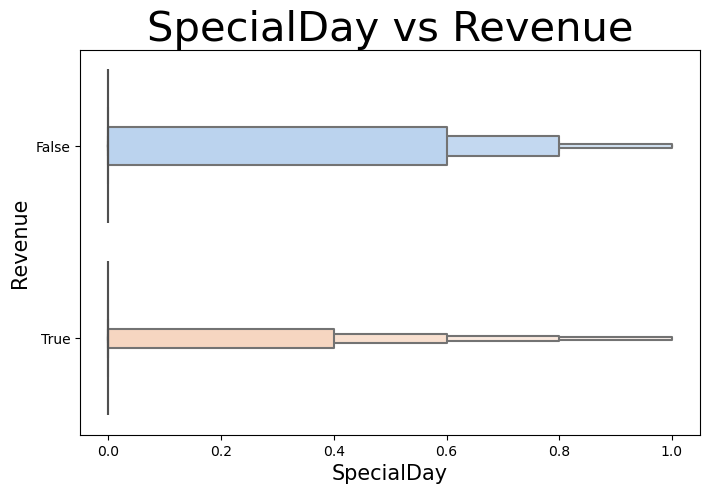

In [113]:
# boxenplot for Special Day vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='SpecialDay', y='Revenue', data=df, palette = 'pastel', orient='h')
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

Of the visitors who do convert, they do so closest to a Special Day with dimishing returns as we taper further from the day. However, it appears that significantly more visitors are not influenced by special days (ie. promotions/discounts) and do not generally convert to buyers.

Take a look at TrafficType & VisitorType

In [62]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

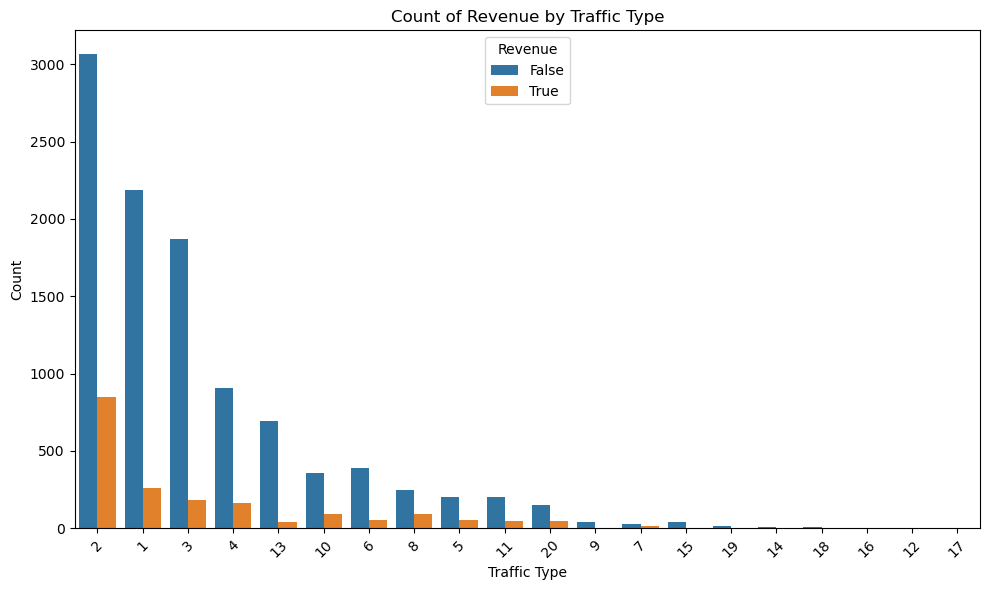

In [70]:
traffic_df = df.groupby(['TrafficType', 'Revenue']).size().reset_index(name='Count')

# Sort the categories by count in descending order
sorted_traffic_types = traffic_df.groupby('TrafficType')['Count'].sum().sort_values(ascending=False).index

# Create the count plot with sorted categories
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', hue='Revenue', data=df, order=sorted_traffic_types)
plt.title('Count of Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.legend(title='Revenue')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

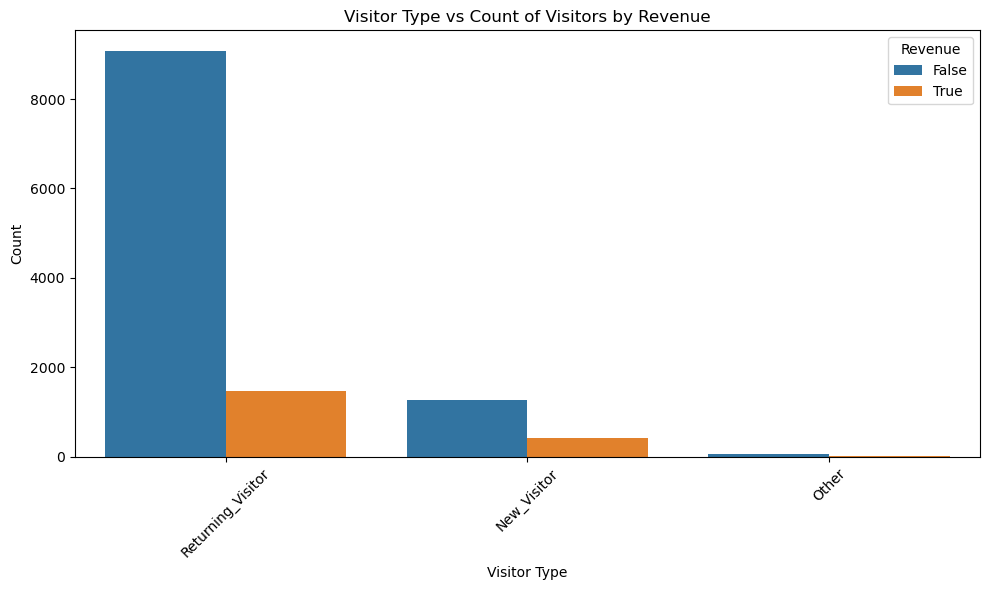

In [117]:
visitor_df = df.groupby(['VisitorType', 'Revenue']).size().reset_index(name='Count')

# Sort the categories by count in descending order
sorted_traffic_types = visitor_df.groupby('VisitorType')['Count'].sum().sort_values(ascending=False).index

# Create the count plot with sorted categories
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitorType', hue='Revenue', data=df, order=sorted_traffic_types)
plt.title('Visitor Type vs Count of Visitors by Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

There are a lot more returning visitors than new visitors over the year, however, although the number of returning visitors that converted to sales appears to be double that of new visitors, the ratio of total visits is in favor of new visitors. This may be a signal that returning customers to the website are unhappy with a potential change to the product offering or website. We explore the difference in ratiors between returning and new visitor revenue below:

In [78]:
#Calculate value counts for Returning Visitors

returning_visitors_df = df[df['VisitorType'] == 'Returning_Visitor']
revenue_counts = returning_visitors_df['Revenue'].value_counts()
revenue_counts

False    9081
True     1470
Name: Revenue, dtype: int64

In [77]:
#Calculate the ratio of True Returning Visitors over all Returning Visitors
total_revenue_count = revenue_counts.sum()
true_ratio = revenue_counts.get(True, 0) / total_revenue_count

print("Ratio of True values to the sum of all values for returning visitors:", true_ratio)


Ratio of True values to the sum of all values for returning visitors: 0.1393232868922377


In [79]:
#Repeat the same steps for New Visitors to Compare the ratios 

new_visitors_df = df[df['VisitorType'] == 'New_Visitor']
revenue_counts_new = new_visitors_df['Revenue'].value_counts()
revenue_counts_new

False    1272
True      422
Name: Revenue, dtype: int64

In [81]:
total_revenue_count_new = revenue_counts_new.sum()
true_ratio = revenue_counts_new.get(True, 0) / total_revenue_count_new

print("Ratio of True values to the sum of all values for returning visitors:", true_ratio)

Ratio of True values to the sum of all values for returning visitors: 0.24911452184179456


Revenue conversion for returning customers is around 14%, compared to 25% for new visitors, despite there being a much larger count of returning visitors than new.

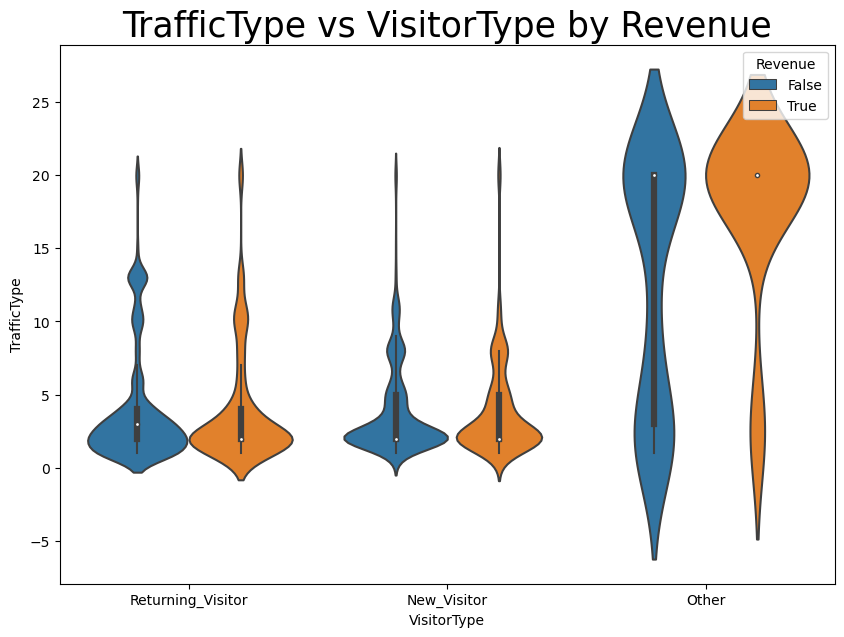

In [180]:
#Create a violin plot to observe TrafficType vs VisitorType by Revenue

plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = df['VisitorType'], y = df['TrafficType'], hue = df['Revenue'], palette = ['#1f77b4', '#ff7f0e'])
plt.title('TrafficType vs VisitorType by Revenue', fontsize = 25)
plt.show()

In [128]:
print(df['TrafficType'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


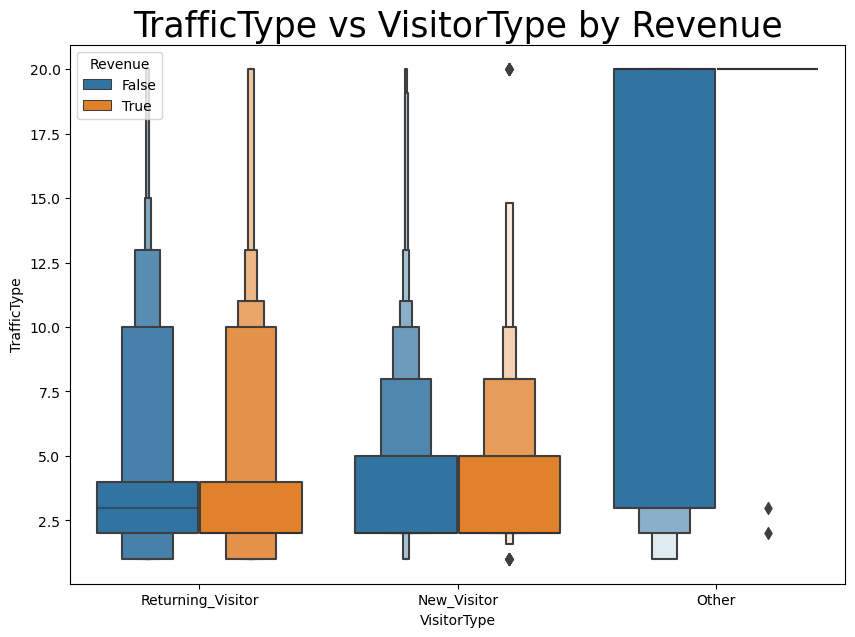

In [131]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxenplot(x = df['VisitorType'], y = df['TrafficType'], hue = df['Revenue'], palette = ['#1f77b4', '#ff7f0e'])
plt.title('TrafficType vs VisitorType by Revenue', fontsize = 25)
plt.show()

In [167]:
grouped_df_traffic_visitor = df.groupby('Revenue')[['TrafficType', 'VisitorType']].value_counts()
print(grouped_df_traffic_visitor)

Revenue  TrafficType  VisitorType      
False    2            Returning_Visitor    2358
         1            Returning_Visitor    2152
         3            Returning_Visitor    1751
         4            Returning_Visitor     838
         2            New_Visitor           698
                                           ... 
True     16           Returning_Visitor       1
         19           Returning_Visitor       1
         7            New_Visitor             1
         3            Other                   1
         2            Other                   1
Length: 78, dtype: int64


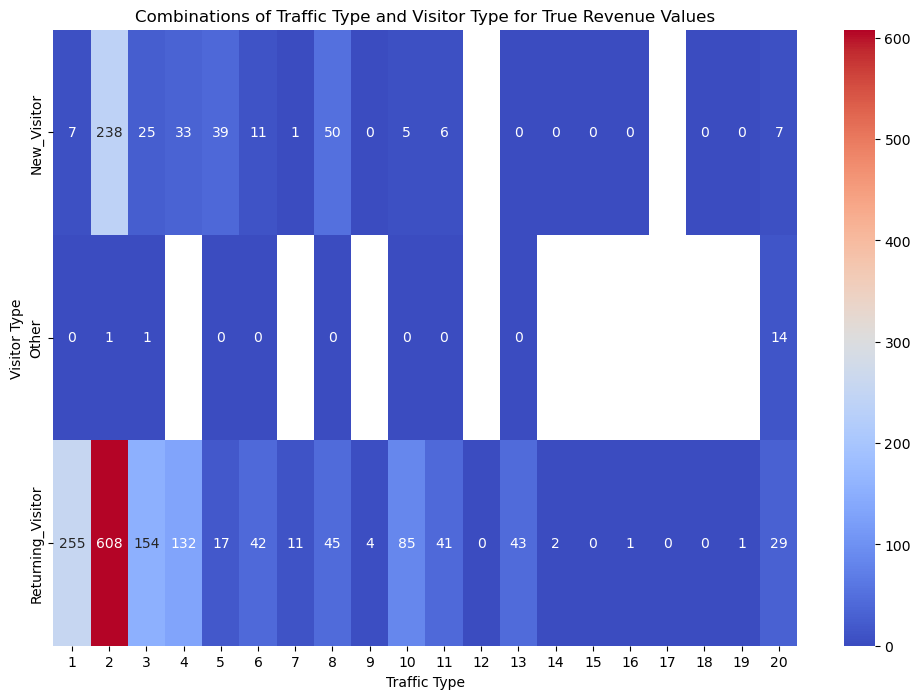

In [181]:
## Create a heatmap to observe the combinations of Traffic and Visitor that had most success 

pivot_df = df.pivot_table(index='VisitorType', columns='TrafficType', values='Revenue', aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='g')
plt.title('Combinations of Traffic Type and Visitor Type for True Revenue Values')
plt.xlabel('Traffic Type')
plt.ylabel('Visitor Type')
plt.show()

Returning Visitors from our most frequented Traffic Type (2) had the most amount of purchases. "Other" did not perform well, lets take a look at it:

In [143]:
other_traffic = df[df['VisitorType'] == 'Other']['VisitorType']

# Print the unique values in the 'TrafficType' column that are equal to 'Other'
print(other_traffic.unique())


['Other']


In [150]:
print(df['VisitorType'].value_counts())
other_count = df[df['VisitorType'] == 'Other'].shape[0]
print("Occurrences of 'Other' in 'VisitorType':", other_count)


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Occurrences of 'Other' in 'VisitorType': 85


In [152]:
# Filter the DataFrame to include rows where 'VisitorType' is 'Other'
other_visitor_rows = df[df['VisitorType'] == 'Other']

# Display the values of 'VisitorType' and 'TrafficType' in the filtered rows
print(other_visitor_rows[['VisitorType', 'TrafficType']])

      VisitorType  TrafficType
5679        Other            5
8006        Other           20
8105        Other           20
8115        Other           20
8187        Other           20
...           ...          ...
12156       Other           20
12185       Other           20
12219       Other            3
12243       Other           20
12277       Other            3

[85 rows x 2 columns]


It appears that the Visitor Type given Returning and New Visitors have a stronger relation to Traffic Types in the lower end of the range, typically from 0 - 10, and the more proffitable Traffic Types are 0-5 

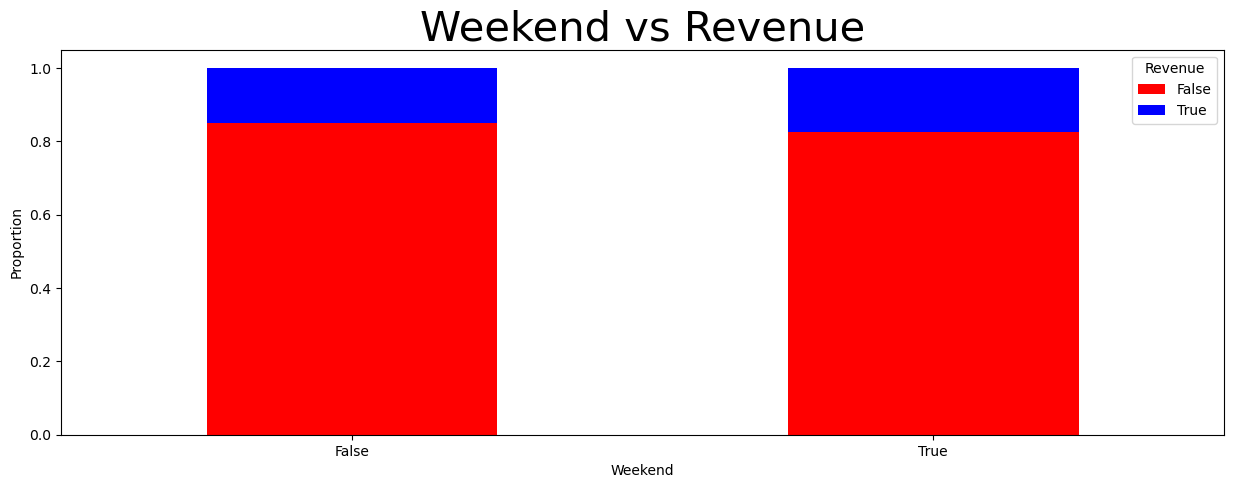

In [89]:
weekend_crosstab = pd.crosstab(df['Weekend'], df['Revenue'])

# Normalize the crosstab by dividing each row by the sum of its elements
normalized_weekend_crosstab = weekend_crosstab.div(weekend_crosstab.sum(axis=1), axis=0)

# Plot the normalized crosstab as a stacked bar plot
normalized_weekend_crosstab.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'blue'])

# Set plot title and labels
plt.title('Weekend vs Revenue', fontsize=30)
plt.xlabel('Weekend')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

Weekend sales vs sales made throughout the week don't vary significantly in revenue conversions, despite the fact the majority of visitors are entering the website throughout the week as we've seen above. 

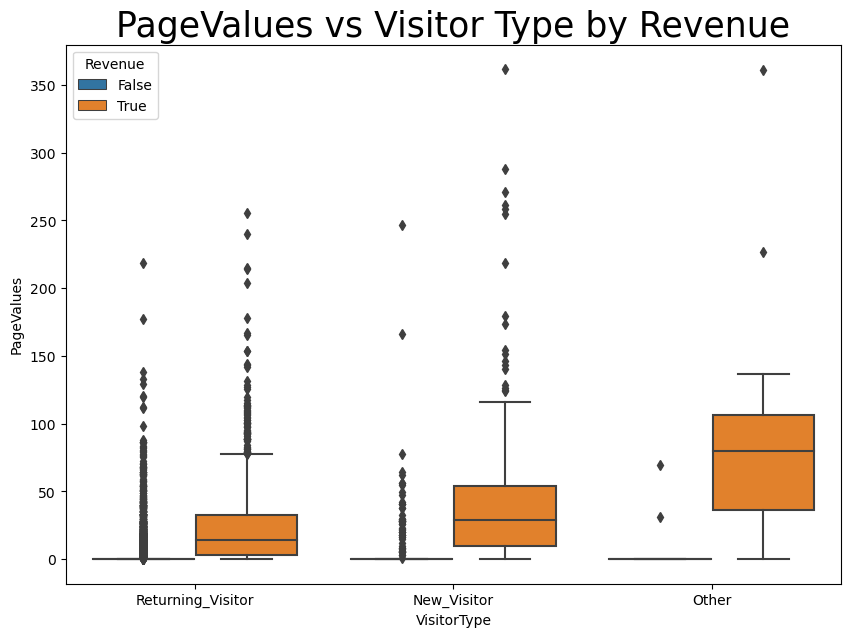

In [102]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = ['#1f77b4', '#ff7f0e'])
plt.title('PageValues vs Visitor Type by Revenue', fontsize = 25)
plt.show()

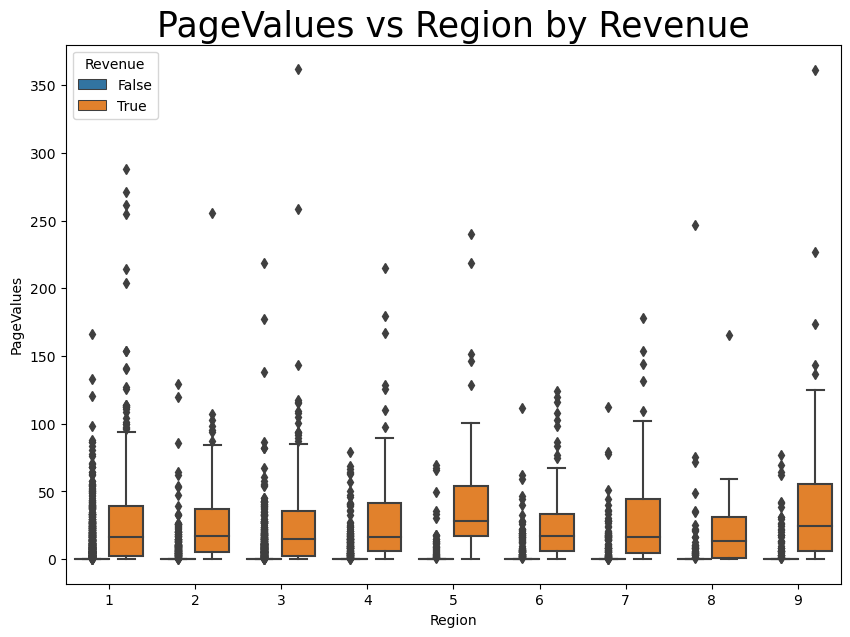

In [120]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = ['#1f77b4', '#ff7f0e'])
plt.title('PageValues vs Region by Revenue', fontsize = 25)
plt.show()

There appear to be many outliers in the graph above, and in some of the other visuals previously. This will serve as a note to inspect outliers in the data during the pre-processing stage. 

Let us now inspect the relationship of OS and Browser with Revenue. 

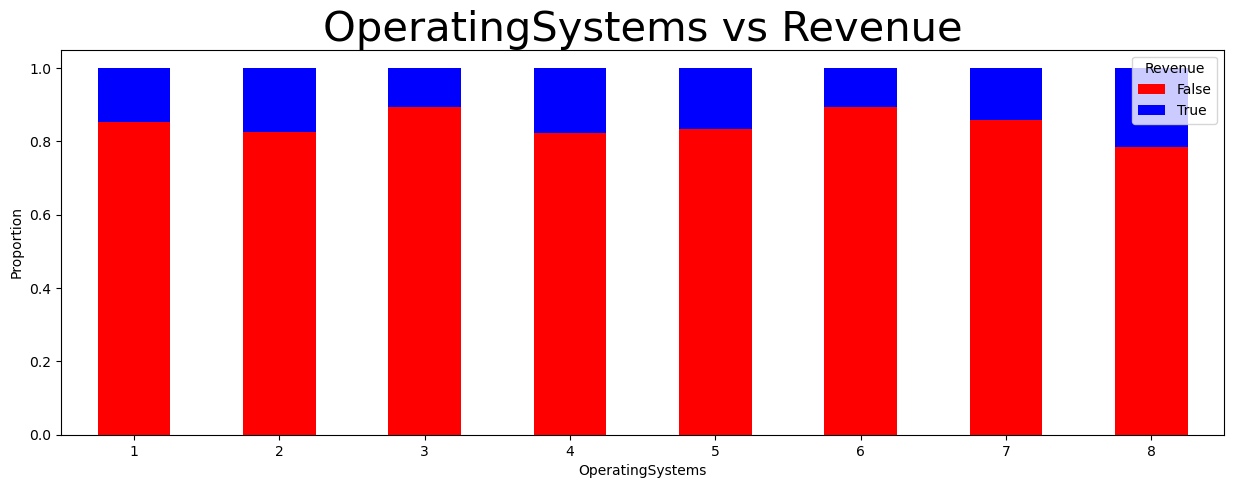

In [158]:
os_crosstab = pd.crosstab(df['OperatingSystems'], df['Revenue'])

# Normalize the crosstab by dividing each row by the sum of its elements
normalized_os_crosstab = os_crosstab.div(os_crosstab.sum(axis=1), axis=0)

# Plot the normalized crosstab as a stacked bar plot
normalized_os_crosstab.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'blue'])

# Set plot title and labels
plt.title('OperatingSystems vs Revenue', fontsize=30)
plt.xlabel('OperatingSystems')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

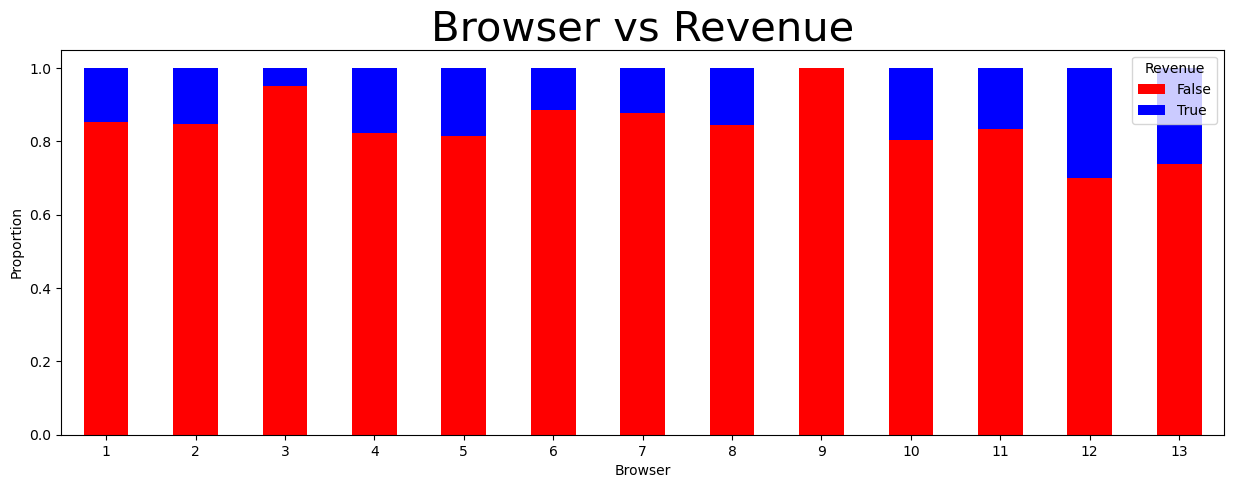

In [161]:
browser_crosstab = pd.crosstab(df['Browser'], df['Revenue'])

# Normalize the crosstab by dividing each row by the sum of its elements
normalized_browser_crosstab = browser_crosstab.div(browser_crosstab.sum(axis=1), axis=0)

# Plot the normalized crosstab as a stacked bar plot
normalized_browser_crosstab.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'blue'])

# Set plot title and labels
plt.title('Browser vs Revenue', fontsize=30)
plt.xlabel('Browser')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

In [163]:
grouped_df_b_os = df.groupby('Revenue')[['Browser', 'OperatingSystems']].mean()
print(grouped_df_b_os)


          Browser  OperatingSystems
Revenue                            
False    2.339474          2.129726
True     2.453354          2.092767


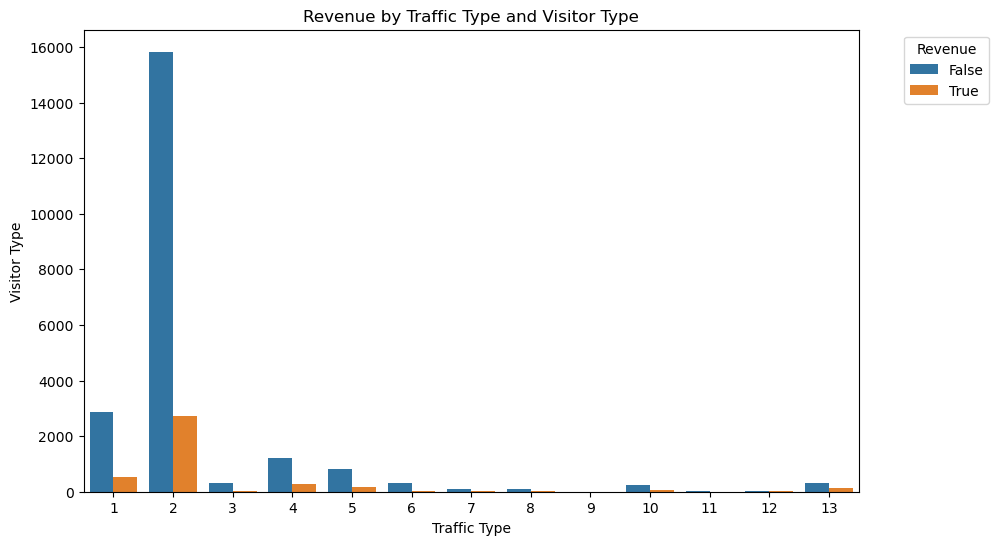

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Browser', y='OperatingSystems', hue='Revenue', estimator=sum, ci=None)
plt.title('Revenue by Traffic Type and Visitor Type')
plt.xlabel('Traffic Type')
plt.ylabel('Visitor Type')
plt.legend(title='Revenue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

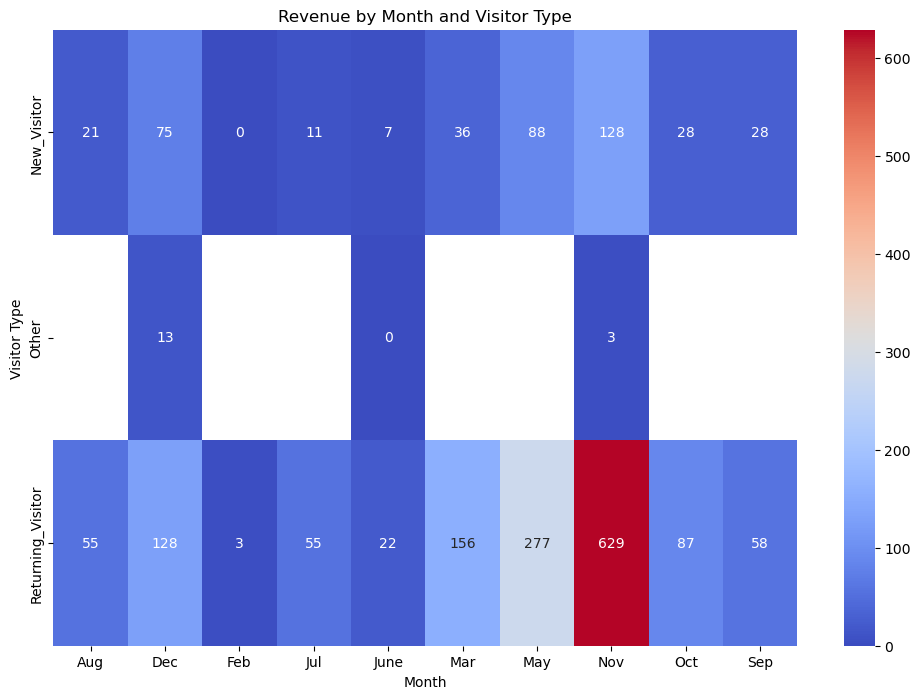

In [183]:
# Create a heatmap of Month vs Visitor Type by Revenue

pivot_df = df.pivot_table(index='VisitorType', columns='Month', values='Revenue', aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='g')
plt.title('Revenue by Month and Visitor Type')
plt.xlabel('Month')
plt.ylabel('Visitor Type')
plt.show()

The greatest amount of conversions are happening with returning visitors, this is consistent with what we saw earlier; given that there is a far greater volume of returning visitors and higher number of conversions, despite a lower conversion rate. 

We can also observe that colder months tend to lead to more conversions, which suggests that there might be seasonal or demographic patterns affecting purchasing behavior. 

As of now we've gathered that Month, and VisitorType have a fairly strong influence on Revenue. Unsurprisingly, Features such as BounceRates, Exit Rates and PageValues have a correlation with one another and collectively influence Revenue as well. 

We don't observe much fluctuation in features such as Browswer, Operating System, Special Day, Weekend and TrafficType (although slight dominance from one channel).

The Product Related page was by far more frequented with the most time spent, possibly suggesting it could be the landing page with great opportunities for reducing Bounce and Exit rates while also finding ways to uitlize Adminstrative and Informational pages as well. 

In [188]:
pivot_table = df.pivot_table(index='Revenue', values=['Administrative', 'Informational', 'ProductRelated'], aggfunc='mean')
print(pivot_table)

         Administrative  Informational  ProductRelated
Revenue                                               
False          2.117732       0.451833       28.714642
True           3.393606       0.786164       48.210168
